# Drive & Predict


## Exploratory Data Analysis

In the following paragraphs, we are going to explore our dataset. After downloading the data, we will look at the data structure, 
the features types, any missing values. Then I will try to find valuable insights.

### Import librairies

In [1]:
## Import
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Module containing custom functions
import models.data as mdt

# Remove warnings display
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

As the dataset is splitted in smaller CSV files, I have built a fucntion that process the folder containing all the CSV files
and load them as a single Dataframe (more details in function load_dataset_as_dataframe models/data.py file).

Each CSV file can be seen as a driving time serie were driving measures are collected through time. For the purpose of the sudy, we have merged all the driving time series into a single one. The time measures have been added so that we are not mixing data from different time series.

Bellow, the dataset (composed by 38 single CSV files) has been downloaded and transformed as a single pandas dataframe.

In [3]:
# Load data and display head
trip_data_df = mdt.load_dataset_as_dataframe('data/trip-data/processed-data')
trip_data_df.head()

time  speed  shift  engine_Load  car_accel  rpm    pitch  \
0  0.023    0.0      0          0.0        0.0  0.0  0.38471   
1  0.029    0.0      0          0.0        0.0  0.0  0.39524   
2  0.039    0.0      0          0.0        0.0  0.0  0.40598   
3  0.049    0.0      0          0.0        0.0  0.0  0.41721   
4  0.058    0.0      0          0.0        0.0  0.0  0.42753   

   lateral_acceleration  passenger_count  car_load  ac_status  window_opening  \
0                  -0.0                2         3          0               6   
1                  -0.0                2         3          0               6   
2                  -0.0                2         3          0               6   
3                  -0.0                2         3          0               6   
4                  -0.0                2         3          0               6   

   radio_volume  rain_intensity  visibility  driver_wellbeing  driver_rush  \
0             2               0          10                 7            0   
1             2               0          10                 7            0   
2             2               0          10                 7            0   
3             2               0          10                 7            0   
4             2               0          10                 7            0   

   idx  
0    0  
1    1  
2    2  
3    3  
4    4

### Exploring dataset structure

In [5]:
# Display data info / describe
trip_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748753 entries, 0 to 7748752
Data columns (total 18 columns):
time                    float64
speed                   float64
shift                   int64
engine_Load             float64
car_accel               float64
rpm                     float64
pitch                   float64
lateral_acceleration    float64
passenger_count         int64
car_load                int64
ac_status               int64
window_opening          int64
radio_volume            int64
rain_intensity          int64
visibility              int64
driver_wellbeing        int64
driver_rush             int64
idx                     int64
dtypes: float64(7), int64(11)
memory usage: 1.0 GB


In [6]:
# Display dataframe describe
trip_data_df.describe()

time         speed         shift   engine_Load     car_accel  \
count  7.748753e+06  7.748753e+06  7.748753e+06  7.748753e+06  7.748753e+06   
mean   3.877428e+04  7.849732e+00  1.760373e+00  7.749423e+00  1.598307e-01   
std    2.238545e+04  7.356323e+00  1.867546e+00  7.092646e+00  7.980135e-01   
min    2.300000e-02 -5.030800e+01  0.000000e+00 -1.000000e+00 -7.377400e+01   
25%    1.937565e+04  5.909900e-01  0.000000e+00  3.100000e+00 -1.933200e-01   
50%    3.878311e+04  6.673900e+00  1.000000e+00  4.622100e+00  1.550200e-01   
75%    5.815870e+04  1.223000e+01  3.000000e+00  1.002200e+01  4.934900e-01   
max    7.753656e+04  3.234300e+01  5.000000e+00  7.535900e+01  6.485500e+00   

                rpm         pitch  lateral_acceleration  passenger_count  \
count  7.748753e+06  7.748753e+06          7.748753e+06     7.748753e+06   
mean   1.594698e+03  9.360308e-01         -1.385369e-02     4.389443e-01   
std    7.070260e+02  2.259470e+00          4.297008e-01     8.644514e-01   
min   -1.000000e+00 -5.302900e+01         -5.963300e+00     0.000000e+00   
25%    8.814200e+02  3.430900e-01         -4.617100e-02     0.000000e+00   
50%    1.579500e+03  1.144500e+00         -1.071600e-07     0.000000e+00   
75%    2.080800e+03  1.809800e+00          3.239900e-02     1.000000e+00   
max    6.060300e+03  1.481900e+01          5.776800e+00     4.000000e+00   

           car_load     ac_status  window_opening  radio_volume  \
count  7.748753e+06  7.748753e+06    7.748753e+06  7.748753e+06   
mean   3.821738e+00  1.267436e-01    7.531711e-01  3.965360e+00   
std    1.708074e+00  4.159354e-01    1.402824e+00  2.014243e+00   
min    3.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%    3.000000e+00  0.000000e+00    0.000000e+00  2.000000e+00   
50%    3.000000e+00  0.000000e+00    0.000000e+00  4.000000e+00   
75%    3.000000e+00  0.000000e+00    1.000000e+00  5.000000e+00   
max    8.000000e+00  4.000000e+00    6.000000e+00  8.000000e+00   

       rain_intensity    visibility  driver_wellbeing   driver_rush  \
count    7.748753e+06  7.748753e+06      7.748753e+06  7.748753e+06   
mean     3.229290e-01  9.476609e+00      5.820096e+00  2.833010e+00   
std      7.256086e-01  7.653467e-01      1.450747e+00  1.300116e+00   
min      0.000000e+00  7.000000e+00      2.000000e+00  0.000000e+00   
25%      0.000000e+00  9.000000e+00      5.000000e+00  2.000000e+00   
50%      0.000000e+00  1.000000e+01      6.000000e+00  3.000000e+00   
75%      0.000000e+00  1.000000e+01      7.000000e+00  3.000000e+00   
max      3.000000e+00  1.000000e+01      8.000000e+00  5.000000e+00   

                idx  
count  7.748753e+06  
mean   3.874376e+06  
std    2.236872e+06  
min    0.000000e+00  
25%    1.937188e+06  
50%    3.874376e+06  
75%    5.811564e+06  
max    7.748752e+06

**Observations** : We have here a large dataset (almost 8M observations) which is composed exclusively by numerical data (`int64` or `float64`). We can notice that some categorical features like `driver_wellbeing` or `driver_rush` are typed as `int64`. For further data modeling, we will have to transform those features.

### Missing & Null values

Further EDA needs to determine if we have any missing values in our dataset.

In [7]:
# Counting number of missing values
trip_data_df.isna().count()

time                    7748753
speed                   7748753
shift                   7748753
engine_Load             7748753
car_accel               7748753
rpm                     7748753
pitch                   7748753
lateral_acceleration    7748753
passenger_count         7748753
car_load                7748753
ac_status               7748753
window_opening          7748753
radio_volume            7748753
rain_intensity          7748753
visibility              7748753
driver_wellbeing        7748753
driver_rush             7748753
idx                     7748753
dtype: int64

**Observations** : Good news, it looks like that we do not have any missing values in our dataset.

### Plotting features correlations


To explore features correlations, we will plot the correlation heatmap.

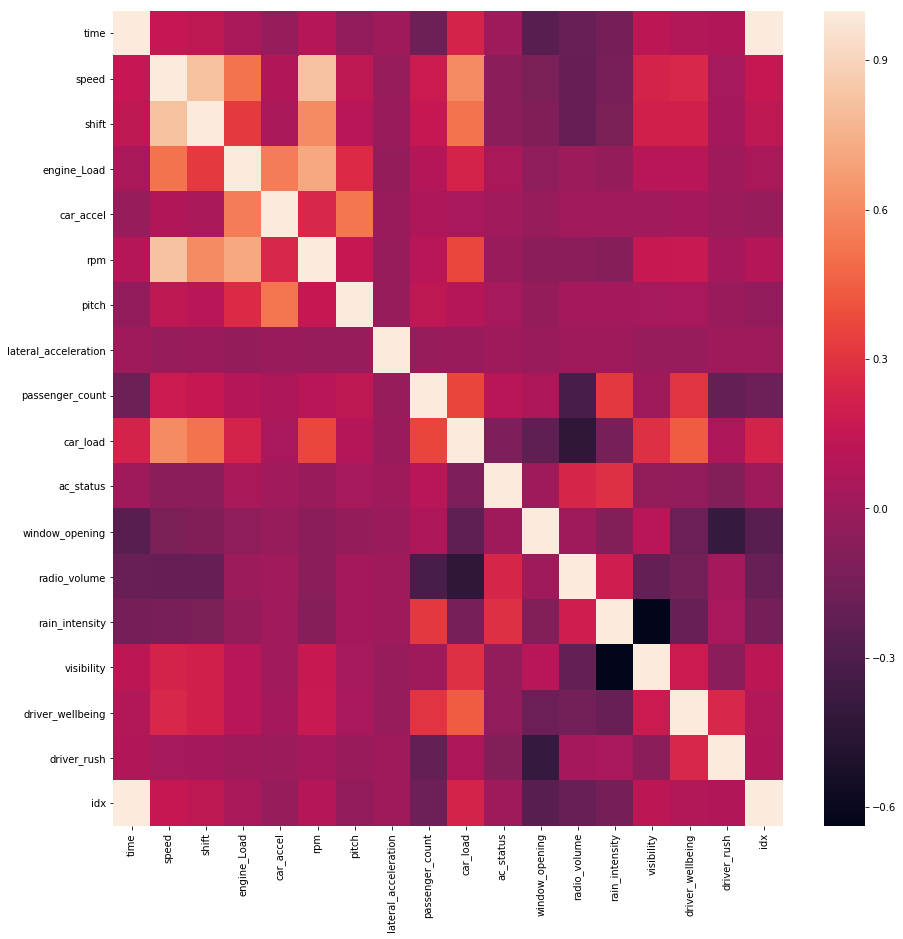

In [8]:
# Plot correlation heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(trip_data_df.corr());

**Observations** : 
* `idx` | `time` : The `idx` feature has been built during the CSV files aggregation process in order to keep the timeseries order and it is highly related to the time feature as it increases over time.
* `speed` | `shift` | `engine_load` | `rpm` : Not so surprisingly `speed`, `shift`, `engine_load` and `rpm` are highly correlated.
* `rain_intensity` | `visibility` : Negatively correlated, the more rain the less visibility.
* `car_load` | `radio_volume`: The more people in the car the less radio volume.

### Plotting features distributions

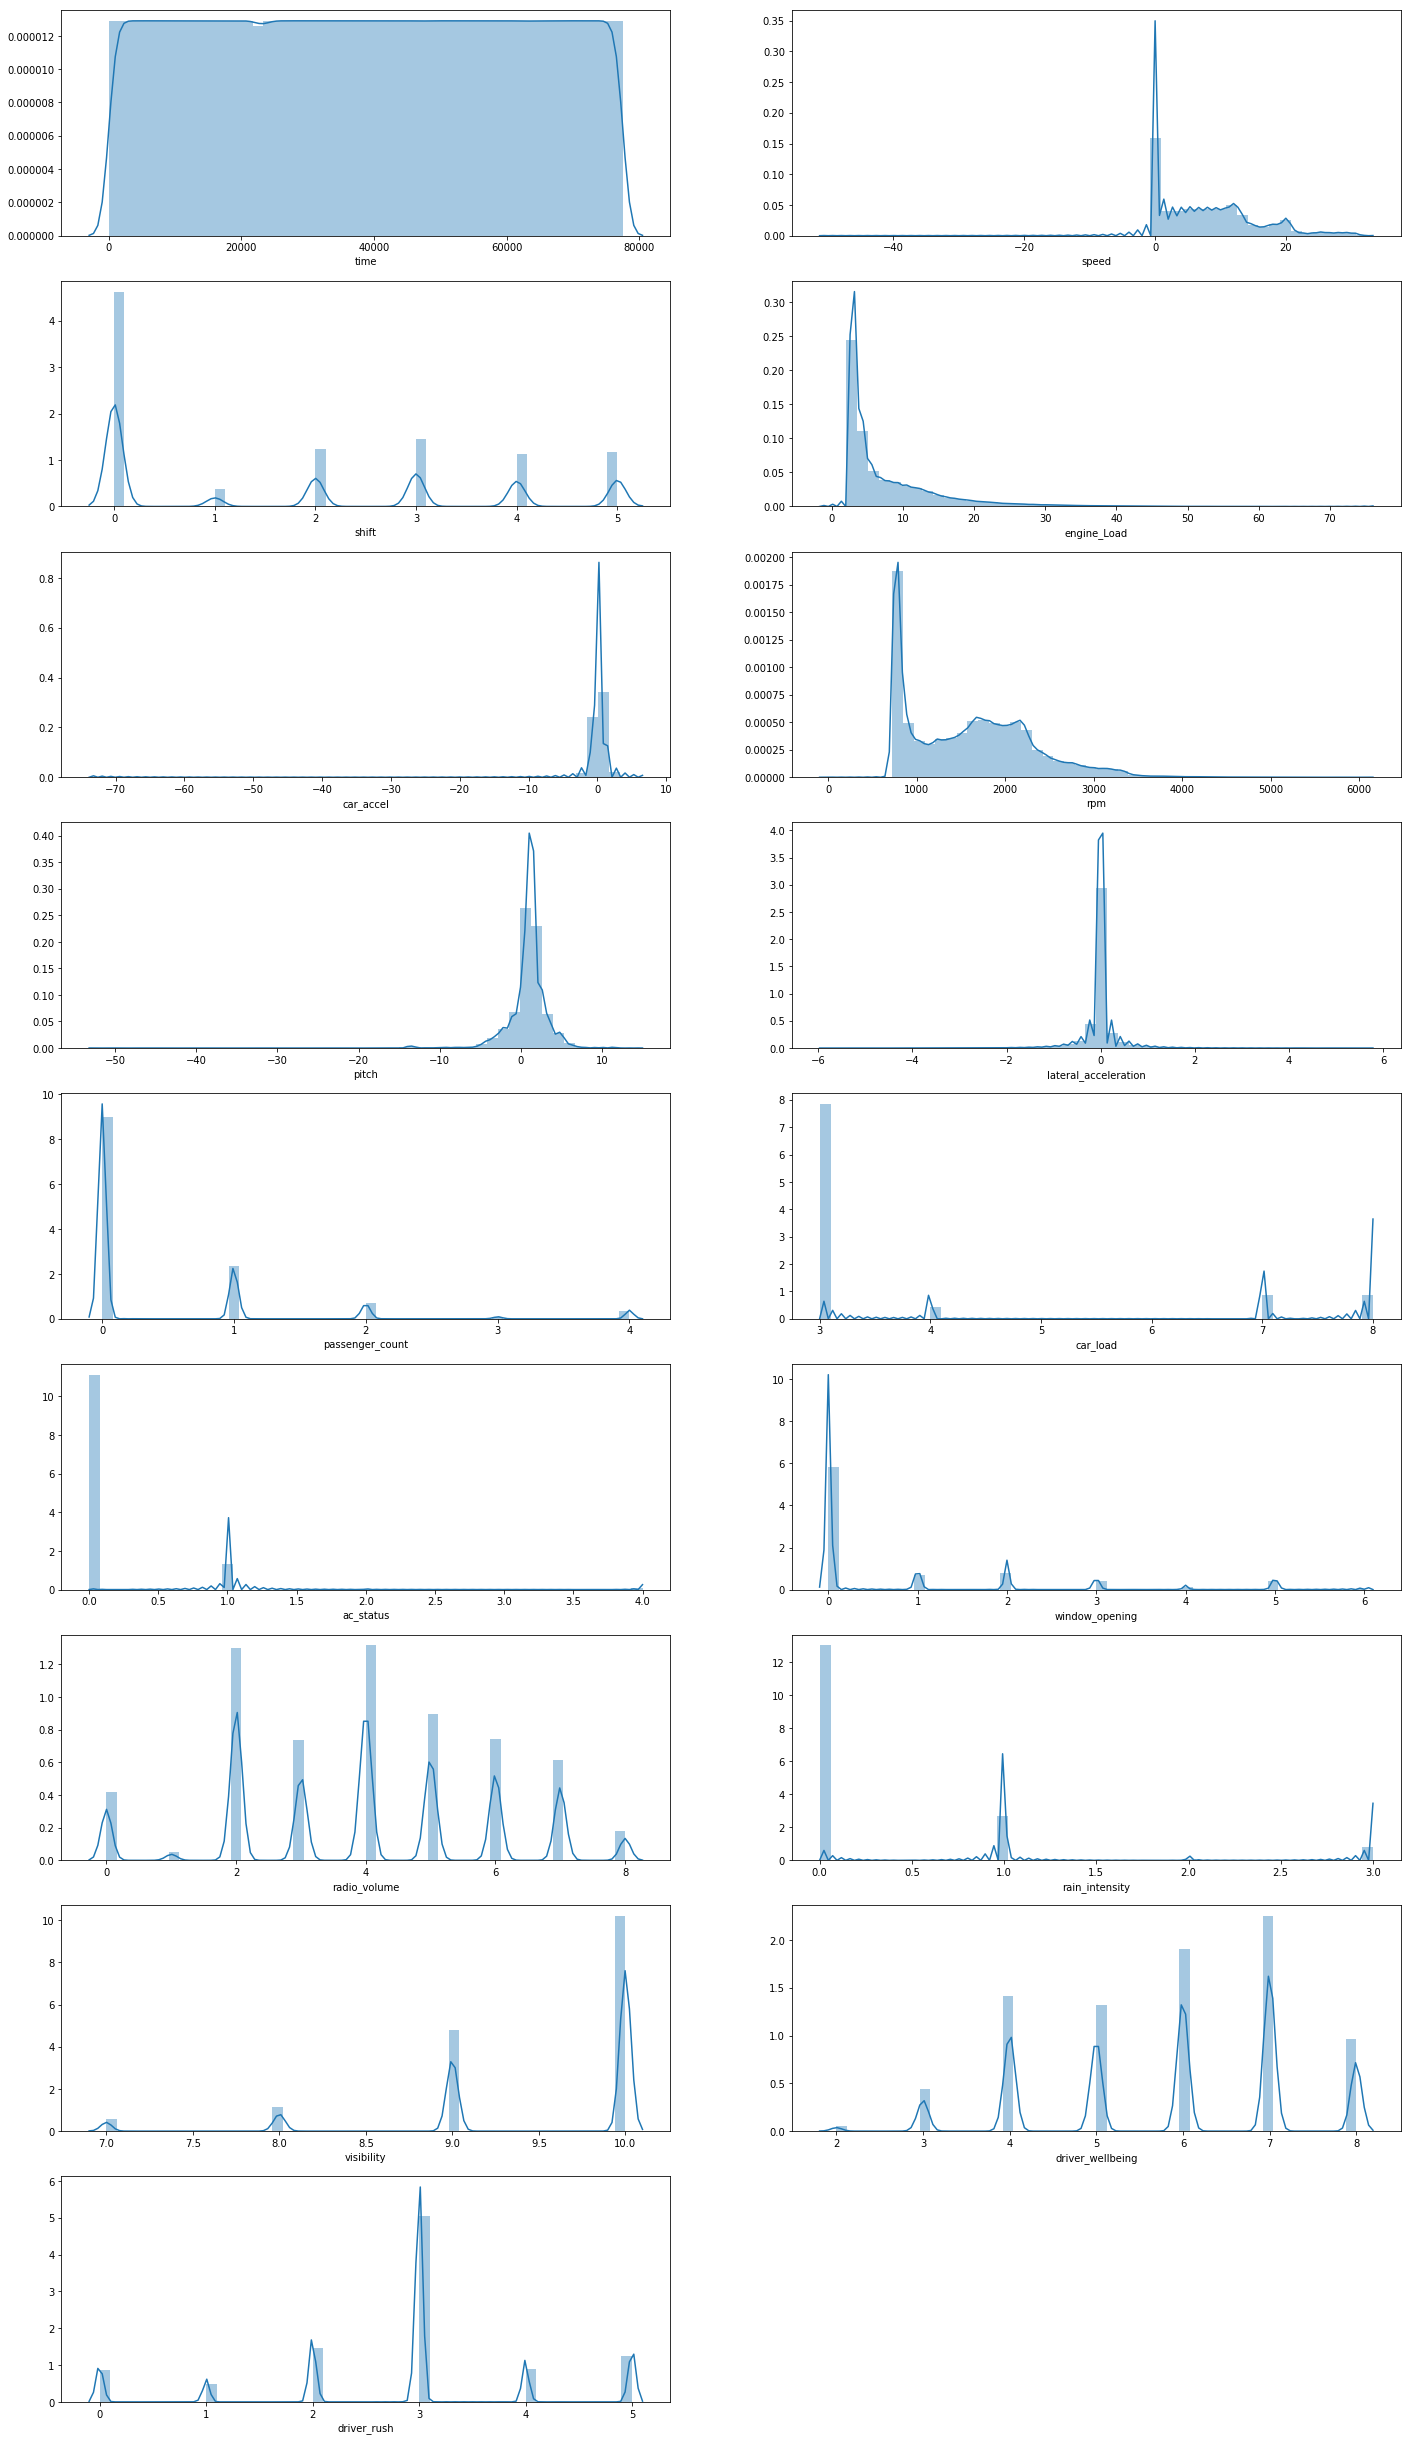

In [9]:
# Plot features distributions.
mdt.plot_feature_distributions(trip_data_df, figsize=(24,44))

**Observations** : The `speed` and `car_accel` distributions show outliers in the observations. Those outliers should be removed from the dataset.

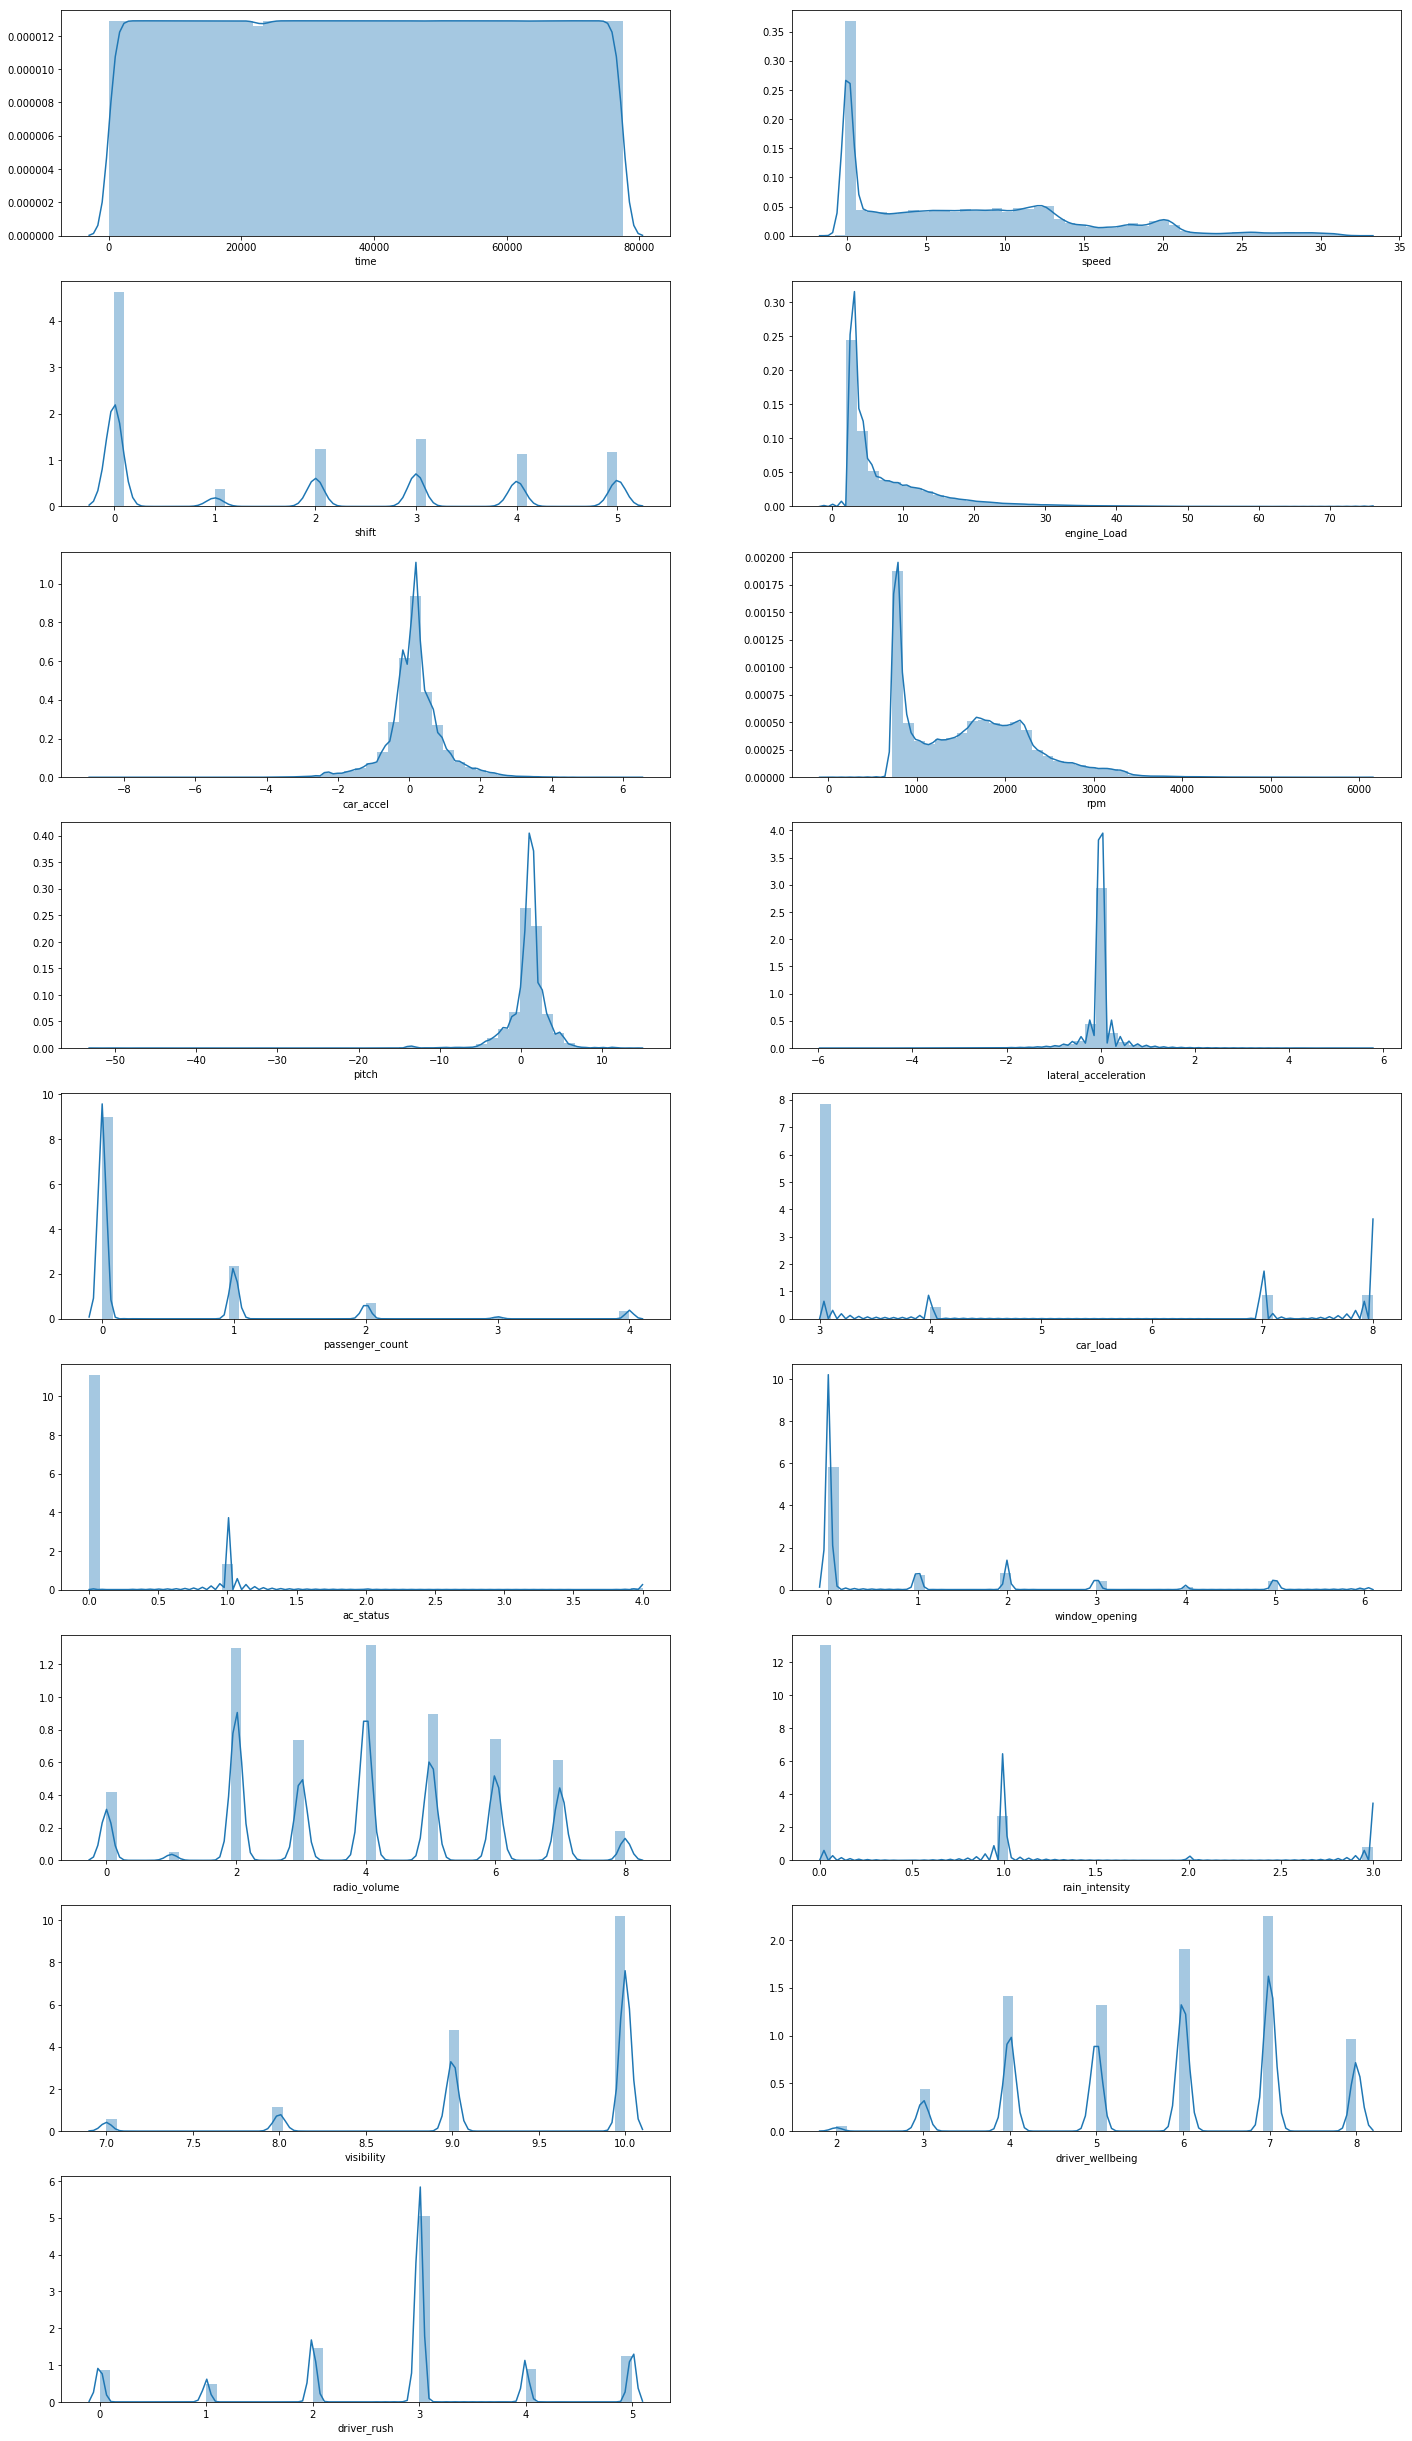

In [10]:
# Removes outliers from dataset
cleaned_df = trip_data_df[trip_data_df.speed > -10 ][trip_data_df.car_accel > -10]
mdt.plot_feature_distributions(cleaned_df, figsize=(24,44))

## Data Visualisation

Now, let's explore our data and each of the events we are interested in :

* braking
* acceleration
* turning

To extract those events, we need to identify which available features are changing significantly when it happens.
For brakes and starts, the `acceleration` feature is a good predictor as it reflects the increase or decrease in speed
at a specific time (negative value corresponds to a brake, positive value to a start or acceleration).
On the other hand, turns won't use `acceleration` to be detected but instead `lateral_acceleration`.

So for each of those event type, we have to choose a threshold value that allows us to tag an driving observation as part of an event.
Some indications of what is a safe brake or acceleration can be found [here](https://copradar.com/chapts/references/acceleration.html)

| Event        | feature   | threshold |
|--------------|-----------|-----------|
| Braking      | car_accel | -2 m/s^2  |
| Acceleration | car_accel | 2 m/s^2   |
| Turning      | lat_accel | 2 m/s^2   |

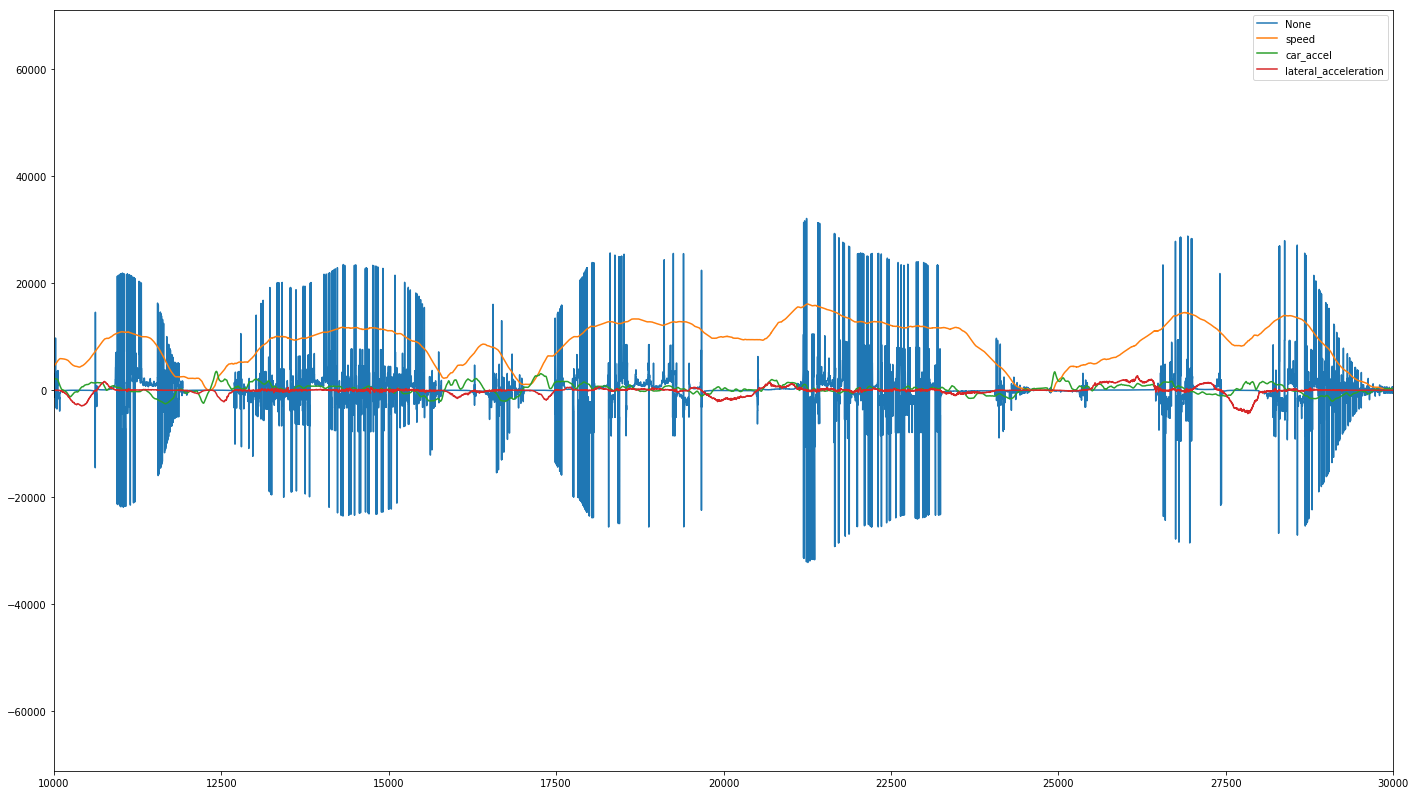

In [22]:
plt.figure(figsize=(24,14))
((cleaned_df.speed)**2 / cleaned_df.lateral_acceleration).plot()
(cleaned_df.speed *1000).plot()
(cleaned_df.car_accel *1000).plot()
(cleaned_df.lateral_acceleration *1000).plot()
plt.xlim([10000,30000])
plt.legend()

/Users/francoisleralle/dev/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


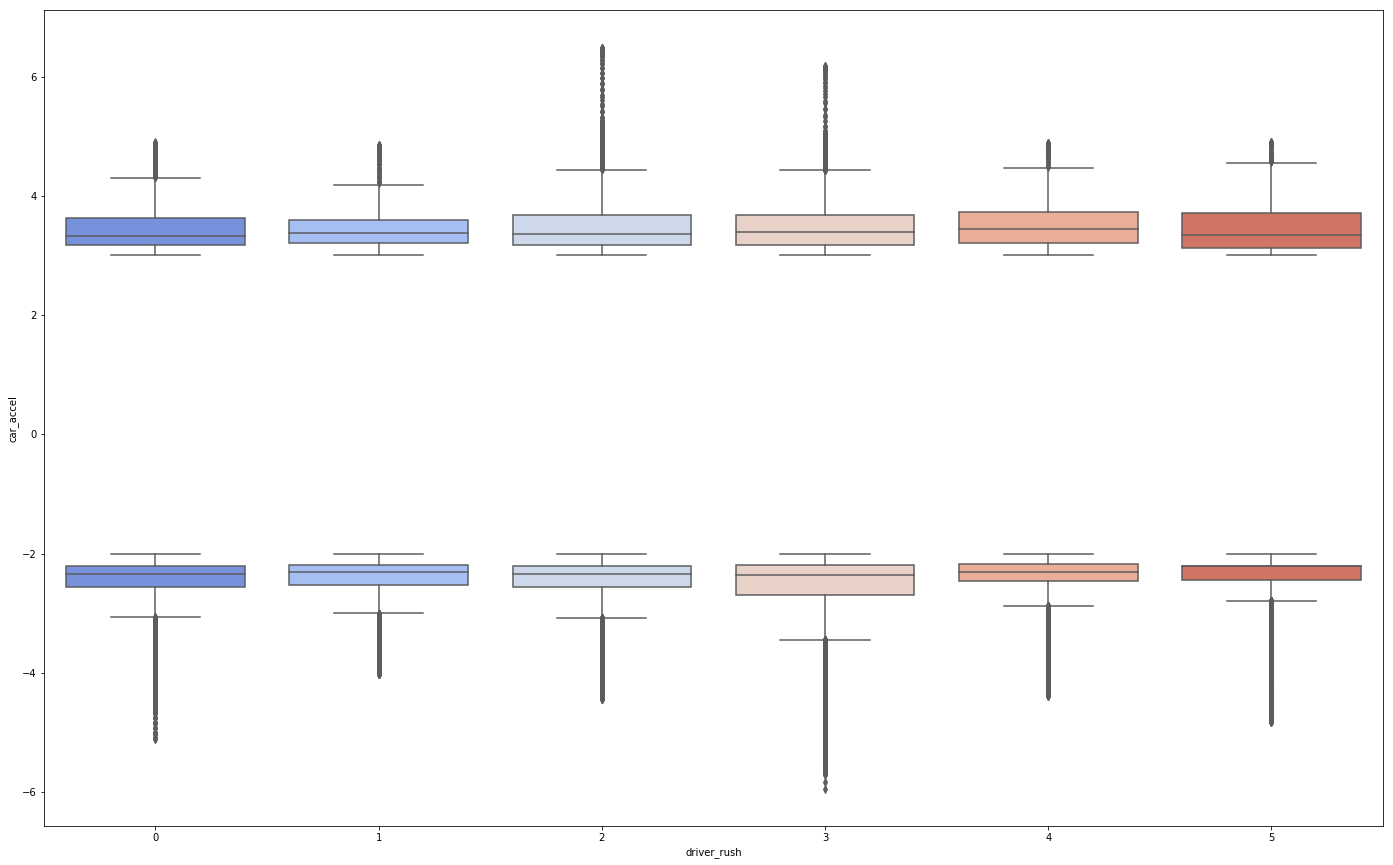

In [8]:
plt.figure(figsize=(24,15))
# sns.violinplot(x="driver_rush", y="rpm", data=trip_data_df[trip_data_df.car_accel > 1.5][trip_data_df.car_accel > -10], palette="coolwarm")
braking_df = trip_data_df[trip_data_df.car_accel < -2][trip_data_df.car_accel > -6]  # Remove some outliers
acceleration_df = trip_data_df[trip_data_df.car_accel > 3]  # Remove some outliers

sns.boxplot(x="driver_rush", y="car_accel", data=braking_df, palette="coolwarm")
sns.boxplot(x="driver_rush", y="car_accel", data=acceleration_df, palette="coolwarm")

# plt.ylim((0, -10))

/Users/francoisleralle/dev/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/francoisleralle/dev/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


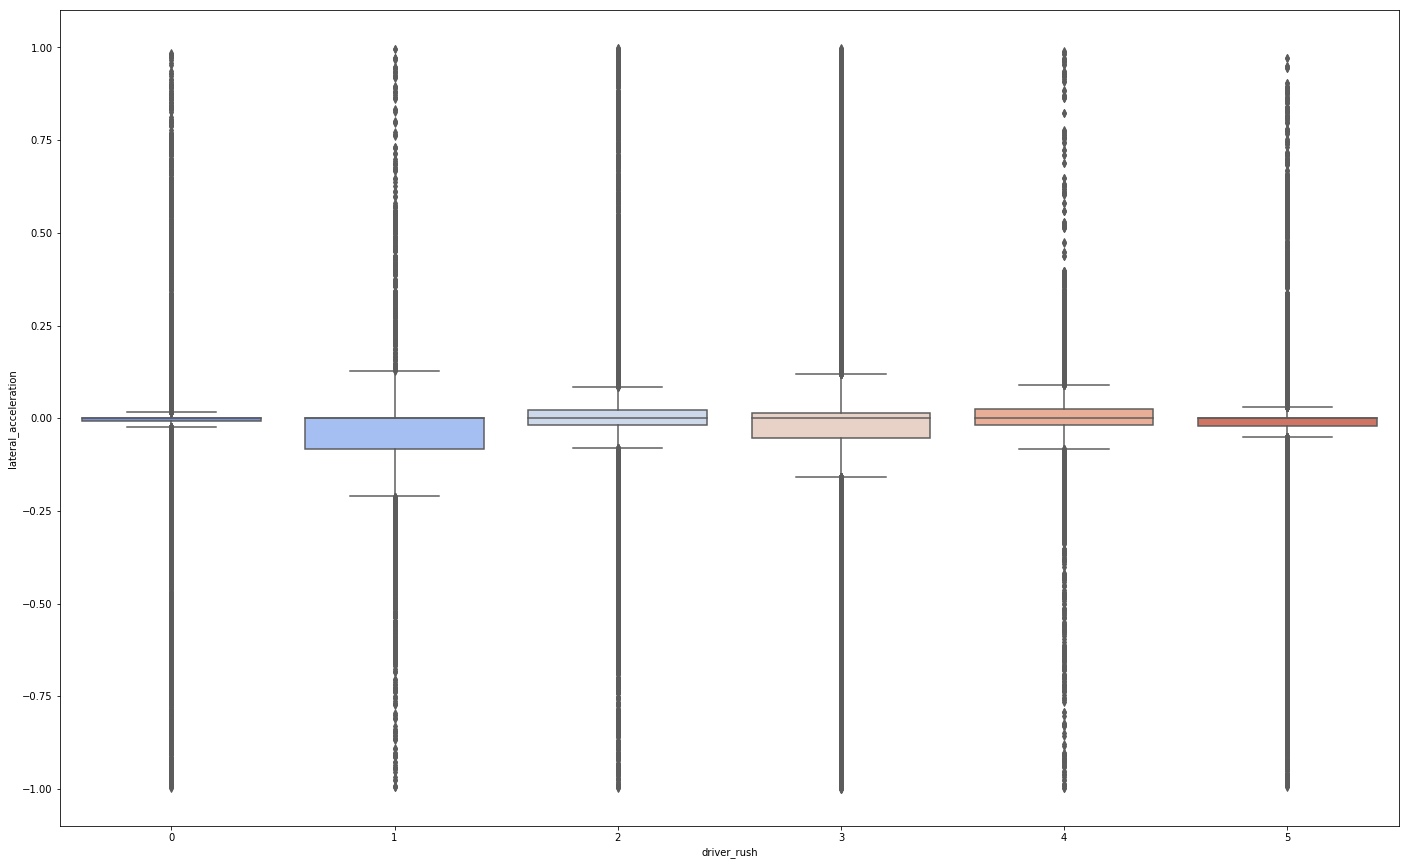

In [14]:
plt.figure(figsize=(24,15))

braking_df = trip_data_df[trip_data_df.car_accel < -2][trip_data_df.car_accel > -6][np.abs(trip_data_df.lateral_acceleration) < 1]  # Remove some outliers
acceleration_df = trip_data_df[trip_data_df.car_accel > 3]  # Remove some outliers

sns.boxplot(x="driver_rush", y="lateral_acceleration", data=braking_df, palette="coolwarm")
# sns.boxplot(x="driver_rush", y="lateral_acceleration", data=acceleration_df, palette="coolwarm")

# plt.ylim((0, -10))

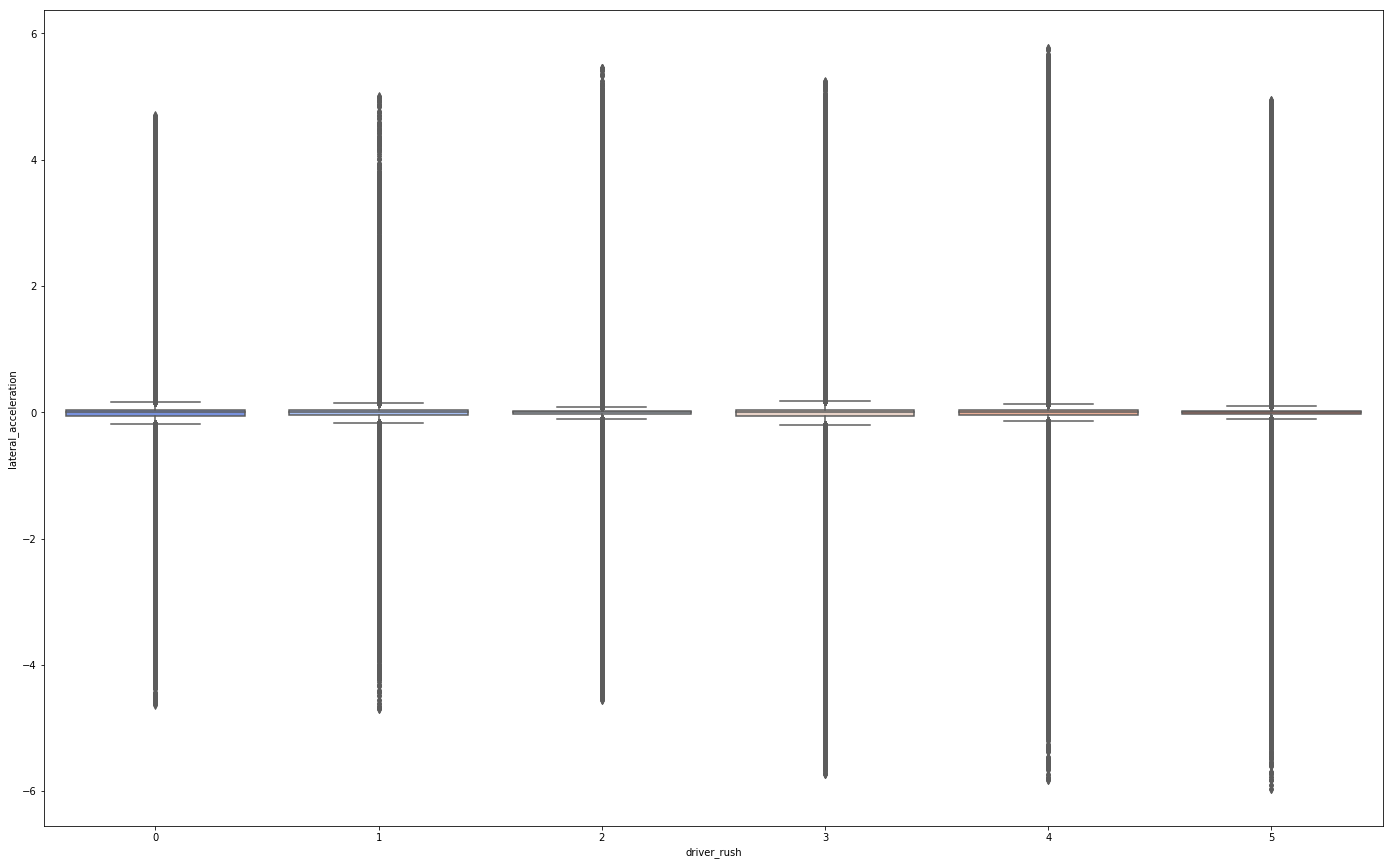

In [9]:
plt.figure(figsize=(24,15))
# sns.violinplot(x="driver_rush", y="rpm", data=trip_data_df[trip_data_df.car_accel > 1.5][trip_data_df.car_accel > -10], palette="coolwarm")
# braking_df = trip_data_df[trip_data_df.car_accel < -2][trip_data_df.car_accel > -6]  # Remove some outliers
# acceleration_df = trip_data_df[trip_data_df.car_accel > 3]  # Remove some outliers

sns.boxplot(x="driver_rush", y="lateral_acceleration", data=trip_data_df, palette="coolwarm")

In [82]:
brake_df = mdt.extract_brake_features(trip_data_df)
brake_df[0].head()

time   speed  shift  engine_Load  car_accel     rpm    pitch  \
2159  21.609  4.1771      0       4.2870    -2.0078  1374.6  0.68389   
2160  21.619  4.1549      0       4.2808    -2.0193  1372.5  0.69188   
2161  21.629  4.1338      0       4.2746    -2.0281  1370.4  0.69990   
2162  21.639  4.1147      0       4.2684    -2.0343  1368.2  0.70796   
2163  21.649  4.0964      0       4.2621    -2.0382  1366.0  0.71605   

      lateral_acceleration  passenger_count  car_load  ac_status  \
2159               1.00880                2         3          0   
2160               0.97848                2         3          0   
2161               0.97352                2         3          0   
2162               0.93610                2         3          0   
2163               0.93194                2         3          0   

      window_opening  radio_volume  rain_intensity  visibility  \
2159               6             2               0          10   
2160               6             2               0          10   
2161               6             2               0          10   
2162               6             2               0          10   
2163               6             2               0          10   

      driver_wellbeing  driver_rush   idx  
2159                 7            0  2159  
2160                 7            0  2160  
2161                 7            0  2161  
2162                 7            0  2162  
2163                 7            0  2163

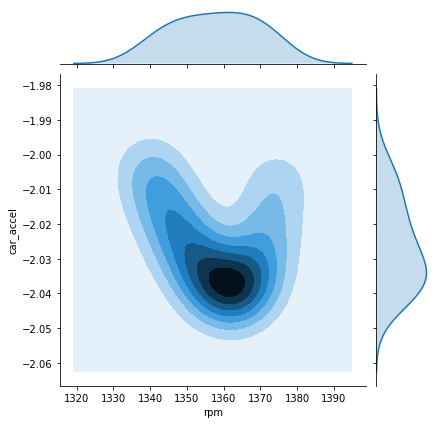

In [179]:
sns.jointplot("rpm", "car_accel", data=brake_df[0], kind='kde')

In [121]:
metrics = mdt.get_events_metrics(brake_df)
metrics.head()

observations  speed_mean  speed_std  speed_min  speed_25  speed_50  \
0          16.0    4.024656   0.096780    3.86830  3.948175   4.02735   
1         155.0    5.693708   1.099900    3.83170  4.711150   5.71820   
2          48.0    1.176983   0.345740    0.62805  0.877075   1.16750   
3          50.0    5.339104   1.394185    2.89410  3.823725   5.99400   
4          53.0    5.611021   0.342524    5.02340  5.324500   5.62510   

   speed_75  speed_max  car_accel_mean  car_accel_std  ...  shift_std  \
0  4.100975     4.1771       -2.026450       0.012233  ...   0.000000   
1  6.671100     7.5014       -2.289961       0.167247  ...   1.366148   
2  1.470800     1.7265       -2.263271       0.136658  ...   0.000000   
3  6.274925     6.5514       -2.020526       0.020398  ...   0.000000   
4  5.898900     6.1818       -2.025408       0.011703  ...   0.000000   

   shift_min  shift_25  shift_50  shift_75  shift_max  driver_rush  \
0        0.0       0.0       0.0       0.0        0.0          0.0   
1        0.0       0.0       0.0       3.0        3.0          0.0   
2        0.0       0.0       0.0       0.0        0.0          0.0   
3        0.0       0.0       0.0       0.0        0.0          0.0   
4        2.0       2.0       2.0       2.0        2.0          0.0   

   visibility  rain_intensity  driver_wellbeing  
0        10.0             0.0               7.0  
1        10.0             0.0               7.0  
2        10.0             0.0               7.0  
3        10.0             0.0               7.0  
4        10.0             0.0               7.0  

[5 rows x 47 columns]

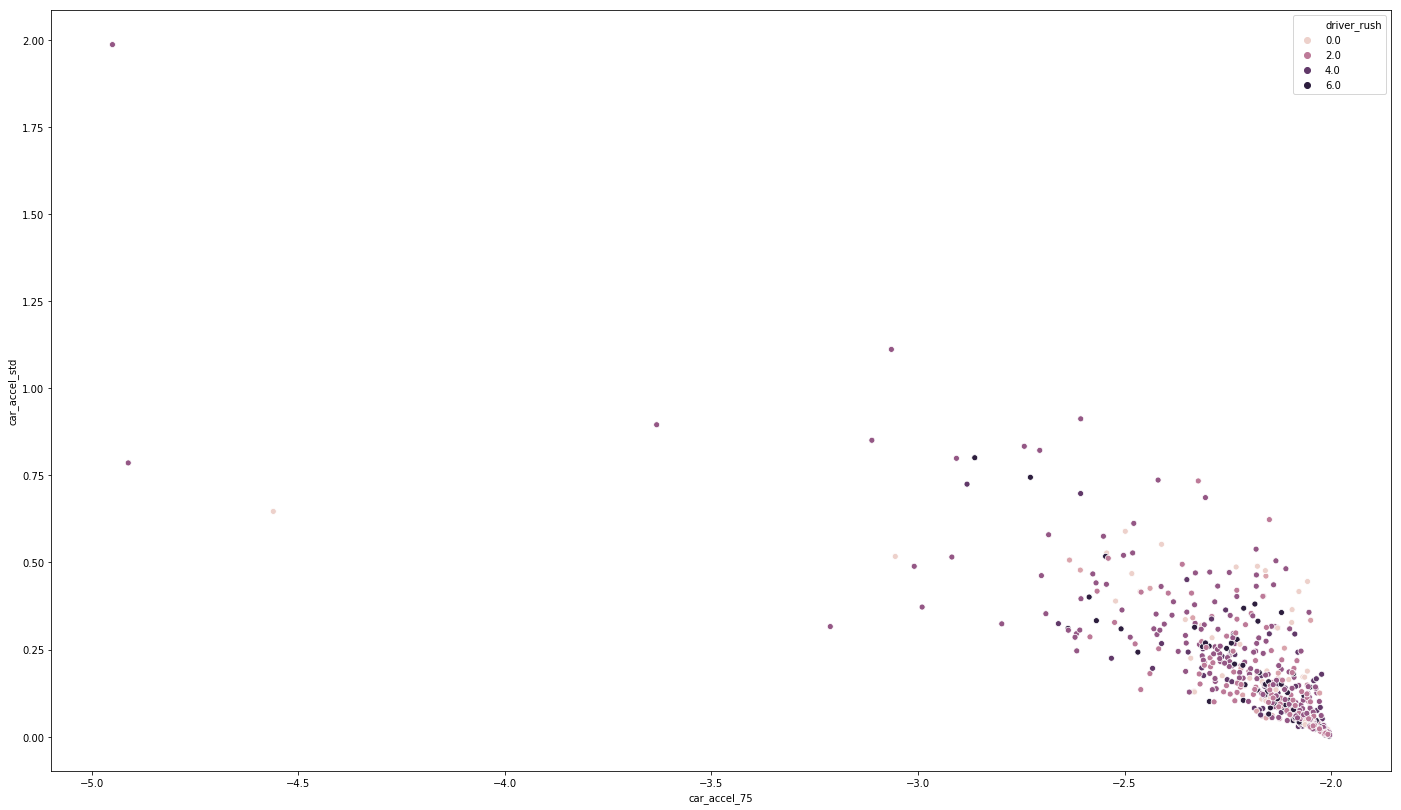

In [144]:
plt.figure(figsize=(24,14))
sns.scatterplot(x='car_accel_75', y='car_accel_std', hue='driver_rush', data=metrics[metrics.car_accel_75 > -10])
# plt.xlim([-3,-2])

/Users/francoisleralle/dev/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/francoisleralle/dev/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


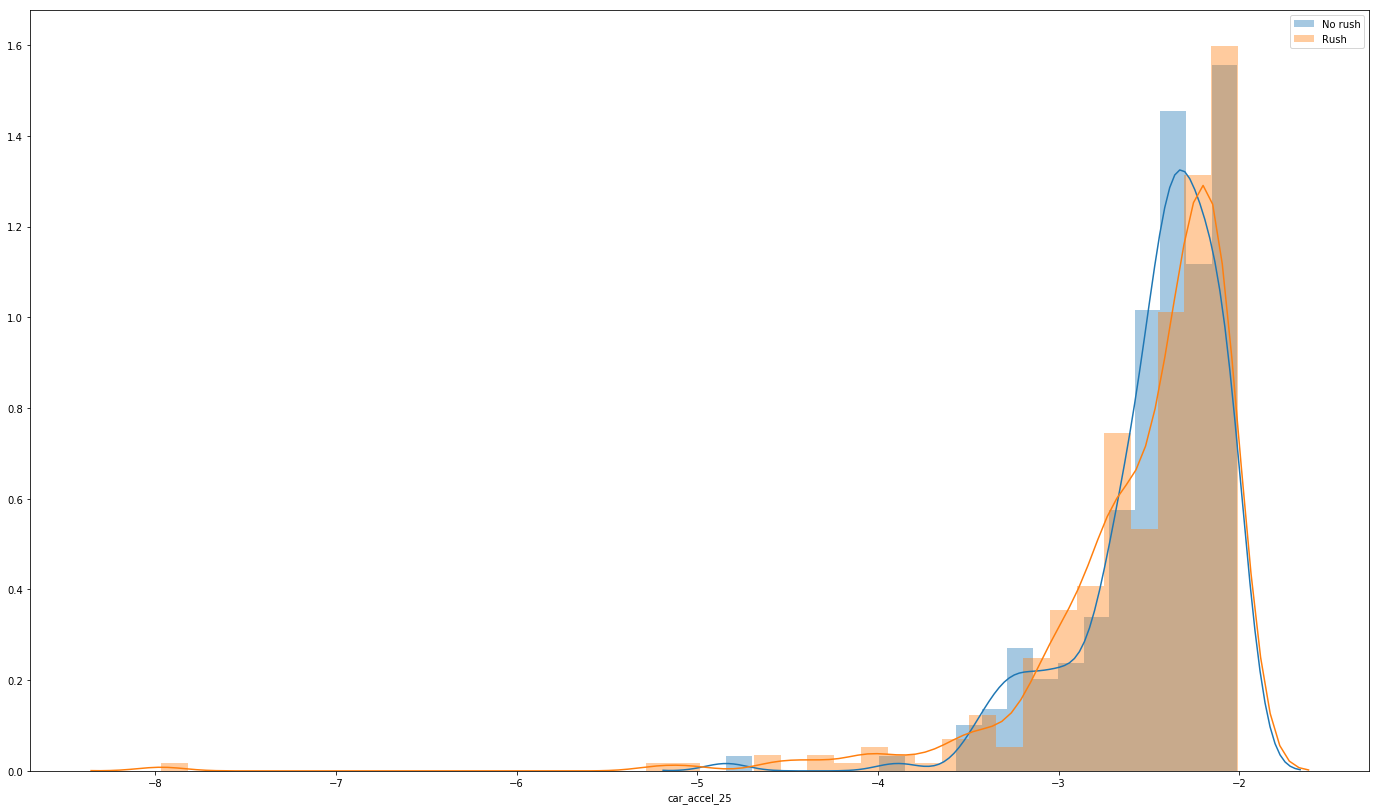

In [155]:
plt.figure(figsize=(24,14))
sns.distplot(metrics[metrics.car_accel_mean > -30][metrics.driver_rush <= 2].car_accel_25, label='No rush')
sns.distplot(metrics[metrics.car_accel_mean > -30][metrics.driver_rush > 2].car_accel_25, label='Rush')
plt.legend()

In [70]:
metrics['std']

std       std
0    0.096780  0.012233
1    1.099900  0.167247
2    0.345740  0.136658
3    1.394185  0.020398
4    0.342524  0.011703
5    0.144523  0.016304
6    0.889611  0.171513
7    1.403865  0.071463
8    0.669968  0.188739
9    0.862719  0.107885
10   0.620578  0.117917
11   1.963288  0.389215
12   1.413612  0.489159
13   0.302156  0.092029
14   0.108886  0.018954
15   0.813685  0.158283
16   0.945669  0.416559
17   0.405721  0.146014
18   2.148650  0.487039
19   0.059917  0.010254
20   2.020031  0.364644
21   1.551617  0.174848
22   0.138851  0.114463
23   3.286990  0.589469
24   0.187395  0.040710
25   0.465719  0.319739
26   0.180190  0.041594
27   3.043257  0.468143
28   0.622550  0.175357
29   0.895374  0.416599
..        ...       ...
558  0.896781  0.066856
559  0.680280  0.121176
560  0.514804  0.060628
561  0.658070  0.211038
562  0.194855  0.049628
563  0.769290  0.305565
564  0.423025  0.402862
565  0.058913  0.022273
566  0.534128  0.417612
567  1.519122  0.297712
568  0.423593  0.212157
569  0.088490  0.008192
570  0.975916  0.099937
571  1.417648  0.266318
572  1.056269  0.220592
573  1.694376  0.205024
574  0.605640  0.122800
575  1.535250  0.111016
576  1.541125  0.420193
577  0.171242  0.027525
578  1.147116  0.162208
579  0.136255  0.010383
580  0.460974  0.134135
581  0.082720  0.006862
582  0.251748  0.051343
583  0.443528  0.104744
584  3.429804  0.512114
585  0.461377  0.085777
586  0.385763  0.089414
587  0.152021  0.030982

[588 rows x 2 columns]

In [73]:
metrics['std'].iloc[:, 1][99]

0.697892188565396

Text(0.5, 1.0, 'speed std 0.6205782097055755, acc std 0.11791733232488608')

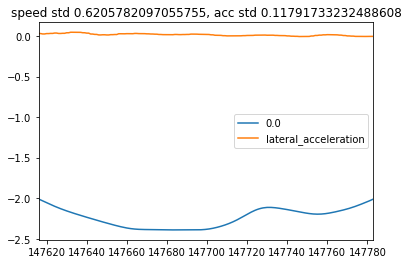

In [81]:
serie_idx = 10
brake_df[serie_idx].car_accel.plot(label=brake_df[serie_idx].driver_rush.mean())
brake_df[serie_idx].lateral_acceleration.plot()
plt.legend()
plt.title('speed std {}, acc std {}'.format(metrics['std'].iloc[:, 0][serie_idx], metrics['std'].iloc[:, 1][serie_idx]))

In [65]:
serie_index = 80
print(brake_df[serie_index].driver_rush.mean())
metrics.iloc[serie_index]

2.0


index     80.000000
count    176.000000
mean      14.009818
std        1.669260
min       11.190000
25%       12.541750
50%       14.036500
75%       15.476500
max       16.779000
count    176.000000
mean      -2.582577
std        0.252295
min       -2.846100
25%       -2.785550
50%       -2.677900
75%       -2.417275
max       -2.000500
Name: 80, dtype: float64

In [78]:
len(brake_df)

588

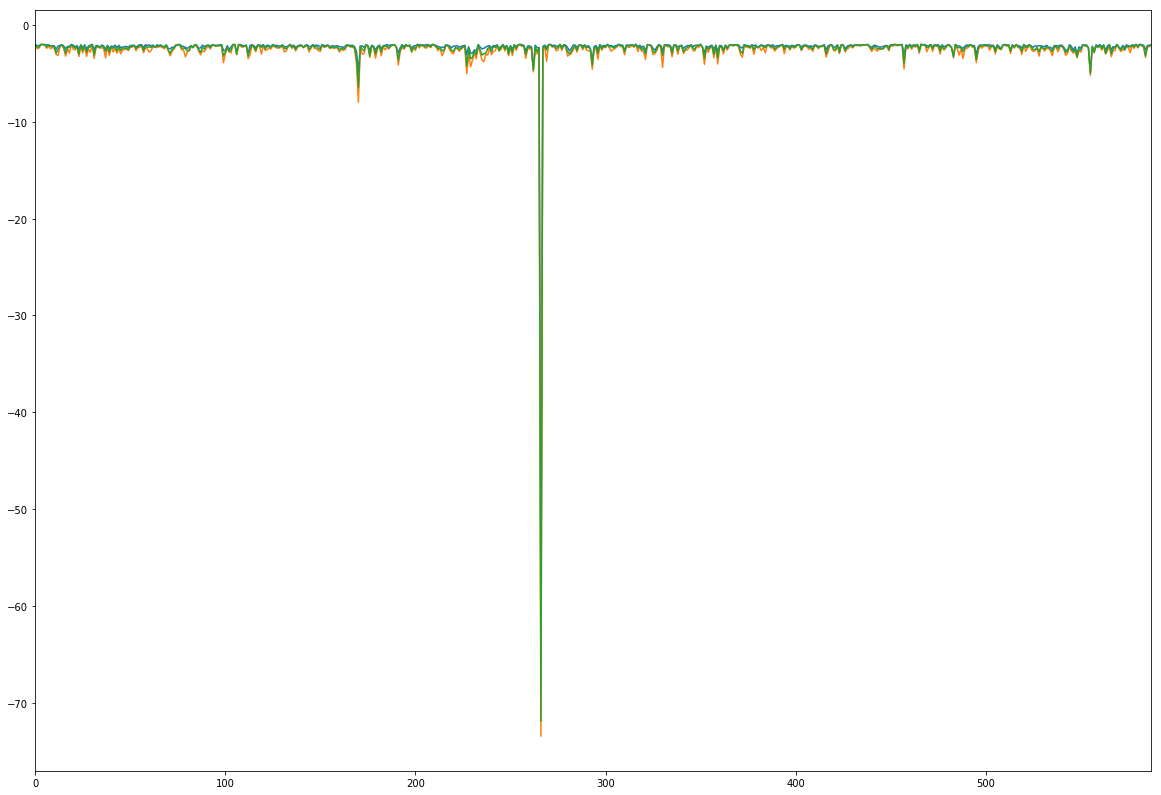

In [164]:
plt.figure(figsize=(20,14))
metrics['75%'].iloc[:, 1].plot()
metrics['25%'].iloc[:, 1].plot()
metrics['50%'].iloc[:, 1].plot()

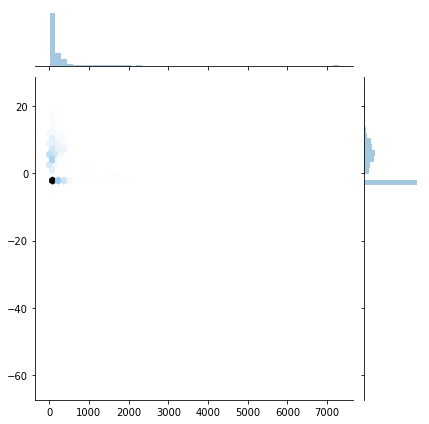

In [170]:
sns.jointplot("count", "75%", data=metrics, kind='hex')

In [15]:
trip_data_df.describe()

time         speed         shift   engine_Load  acceleration  \
count  7.748753e+06  7.748753e+06  7.748753e+06  7.748753e+06  7.748753e+06   
mean   1.252454e+03  7.849732e+00  1.760373e+00  7.749423e+00  1.598307e-01   
std    8.966556e+02  7.356323e+00  1.867546e+00  7.092646e+00  7.980135e-01   
min    1.600000e-02 -5.030800e+01  0.000000e+00 -1.000000e+00 -7.377400e+01   
25%    5.320300e+02  5.909900e-01  0.000000e+00  3.100000e+00 -1.933200e-01   
50%    1.115600e+03  6.673900e+00  1.000000e+00  4.622100e+00  1.550200e-01   
75%    1.779100e+03  1.223000e+01  3.000000e+00  1.002200e+01  4.934900e-01   
max    4.306000e+03  3.234300e+01  5.000000e+00  7.535900e+01  6.485500e+00   

                rpm         pitch  lateral_acceleration  passenger_count  \
count  7.748753e+06  7.748753e+06          7.748753e+06     7.748753e+06   
mean   1.594698e+03  9.360308e-01         -1.385369e-02     4.389443e-01   
std    7.070260e+02  2.259470e+00          4.297008e-01     8.644514e-01   
min   -1.000000e+00 -5.302900e+01         -5.963300e+00     0.000000e+00   
25%    8.814200e+02  3.430900e-01         -4.617100e-02     0.000000e+00   
50%    1.579500e+03  1.144500e+00         -1.071600e-07     0.000000e+00   
75%    2.080800e+03  1.809800e+00          3.239900e-02     1.000000e+00   
max    6.060300e+03  1.481900e+01          5.776800e+00     4.000000e+00   

           car_load     ac_status  window_opening  radio_volume  \
count  7.748753e+06  7.748753e+06    7.748753e+06  7.748753e+06   
mean   3.821738e+00  1.267436e-01    7.531711e-01  3.965360e+00   
std    1.708074e+00  4.159354e-01    1.402824e+00  2.014243e+00   
min    3.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
25%    3.000000e+00  0.000000e+00    0.000000e+00  2.000000e+00   
50%    3.000000e+00  0.000000e+00    0.000000e+00  4.000000e+00   
75%    3.000000e+00  0.000000e+00    1.000000e+00  5.000000e+00   
max    8.000000e+00  4.000000e+00    6.000000e+00  8.000000e+00   

       rain_intensity    visibility  driver_wellbeing   driver_rush  
count    7.748753e+06  7.748753e+06      7.748753e+06  7.748753e+06  
mean     3.229290e-01  9.476609e+00      5.820096e+00  2.833010e+00  
std      7.256086e-01  7.653467e-01      1.450747e+00  1.300116e+00  
min      0.000000e+00  7.000000e+00      2.000000e+00  0.000000e+00  
25%      0.000000e+00  9.000000e+00      5.000000e+00  2.000000e+00  
50%      0.000000e+00  1.000000e+01      6.000000e+00  3.000000e+00  
75%      0.000000e+00  1.000000e+01      7.000000e+00  3.000000e+00  
max      3.000000e+00  1.000000e+01      8.000000e+00  5.000000e+00

In [55]:
trip_data_df[572810:]

time     speed  shift  engine_Load  acceleration     rpm  \
572810    5728.400  0.000000      0       0.0000      0.000000    0.00   
572811    5728.400  0.000000      0       0.0000      0.000000    0.00   
572812    5728.400  0.000000      0       0.0000      0.000000    0.00   
572813    5728.400  0.000000      0       0.0000      0.000000    0.00   
572814    5728.400  0.000000      0       0.0000      0.000000    0.00   
572815    5728.400  0.000000      0       0.0000      0.000000    0.00   
572816    5728.400  0.000000      0       0.0000      0.000000    0.00   
572817    5728.400  0.000000      0       0.0000      0.000000    0.00   
572818    5728.500  0.000000      0       0.0000      0.000000    0.00   
572819    5728.500  0.000000      0       0.0000      0.000000    0.00   
572820    5728.523  0.000000      0       0.0000      0.000000    0.00   
572821    5728.531  0.000000      0       0.0000      0.000000    0.00   
572822    5728.538  0.000000      0       0.0000      0.000000    0.00   
572823    5728.549  0.000000      0       0.0000      0.000000    0.00   
572824    5728.558  0.000000      0       0.0000      0.000000    0.00   
572825    5728.568  0.000000      0       0.0000      0.000000    0.00   
572826    5728.578  0.000000      0       0.0000      0.000000    0.00   
572827    5728.588  0.000000      0       0.0000      0.000000    0.00   
572828    5728.598  0.000000      0       0.0000      0.000000    0.00   
572829    5728.608  0.000000      0       0.0000      0.000000    0.00   
572830    5728.618  0.000000      0       0.0000      0.000000    0.00   
572831    5728.628  0.000000      0       0.0000      0.000000    0.00   
572832    5728.638  0.000000      0       0.0000      0.000000    0.00   
572833    5728.648  0.000687      0       0.0000      0.000000    0.00   
572834    5728.659  0.001471      0       0.0000      0.000000    0.00   
572835    5728.668  0.002551      0       0.0000      0.000000    0.00   
572836    5728.678  0.002747      0       0.0000      0.000000    0.00   
572837    5728.688  0.003924      0       0.0000      0.000000    0.00   
572838    5728.698  0.005199      0       0.0000      0.000000    0.00   
572839    5728.708  0.004905      0       0.0000      0.000000    0.00   
...            ...       ...    ...          ...           ...     ...   
7748723  77536.260  0.001422      0       4.3000     -0.004496  816.88   
7748724  77536.260 -0.000319      0       4.3000     -0.003815  816.89   
7748725  77536.260 -0.001668      0       4.3000     -0.002998  816.90   
7748726  77536.260 -0.000270      0       4.3000     -0.002070  816.91   
7748727  77536.260 -0.000245      0       4.1961     -0.001060  800.88   
7748728  77536.260 -0.000809      0       0.0000      0.000000    0.00   
7748729  77536.260  0.000196      0       0.0000      0.000000    0.00   
7748730  77536.260  0.001496      0       0.0000      0.000000    0.00   
7748731  77536.260  0.000049      0       0.0000      0.000000    0.00   
7748732  77536.260 -0.001790      0       0.0000      0.000000    0.00   
7748733  77536.360 -0.001471      0       0.0000      0.000000    0.00   
7748734  77536.360 -0.000368      0       0.0000      0.000000    0.00   
7748735  77536.360 -0.000245      0       0.0000      0.000000    0.00   
7748736  77536.360 -0.000907      0       0.0000      0.000000    0.00   
7748737  77536.360  0.000196      0       0.0000      0.000000    0.00   
7748738  77536.360  0.000319      0       0.0000      0.000000    0.00   
7748739  77536.360 -0.001030      0       0.0000      0.000000    0.00   
7748740  77536.360 -0.001888      0       0.0000      0.000000    0.00   
7748741  77536.360  0.000000      0       0.0000      0.000000    0.00   
7748742  77536.360  0.000000      0       0.0000      0.000000    0.00   
7748743  77536.460  0.000000      0       0.0000      0.000000    0.00   
7748744  77536.460  0.000000      0       0.0000      0.000000    0.00   
7748745  77536.460

In [102]:
df = load_dataset_as_dataframe('data')
df.tail()

/Users/francoisleralle/Documents/USA/Flatiron/workspace/capstone/drive-predict/models/data.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(dataframe_list, ignore_index=True)


app_accel_0  app_accel_1  app_accel_2  app_angular_v_0  \
2612113          NaN          NaN          NaN              NaN   
2612114          NaN          NaN          NaN              NaN   
2612115          NaN          NaN          NaN              NaN   
2612116          NaN          NaN          NaN              NaN   
2612117          NaN          NaN          NaN              NaN   

         app_angular_v_1  app_angular_v_2  app_heading  app_pitch  app_pos_0  \
2612113              NaN              NaN          NaN        NaN        NaN   
2612114              NaN              NaN          NaN        NaN        NaN   
2612115              NaN              NaN          NaN        NaN        NaN   
2612116              NaN              NaN          NaN        NaN        NaN   
2612117              NaN              NaN          NaN        NaN        NaN   

         app_pos_1  ...  velodyne_imu_10  velodyne_imu_11  velodyne_imu_2  \
2612113        NaN  ...      3672.491864      4076.426747      792.898090   
2612114        NaN  ...       232.864492      4069.338925      783.564875   
2612115        NaN  ...      4071.863834      4072.978362      789.962133   
2612116        NaN  ...      1937.145843      4083.000000      795.000000   
2612117        NaN  ...      4090.000000      4092.000000      798.000000   

         velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  \
2612113        7.388537     4093.369432       43.101910      785.305731   
2612114        3.282438      232.259904       43.056488      781.112975   
2612115        3.994590     4062.907111       43.000000      790.945904   
2612116        3.000000        5.000000       43.000000      790.000000   
2612117        3.000000     4095.000000       44.000000      788.000000   

         velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  
2612113     4080.611463       69.242031       69.898090  
2612114     4076.225950       85.870250       70.000000  
2612115     4078.983771       90.978362       70.994590  
2612116     4084.000000       88.461030       69.419154  
2612117     4094.186891       92.373782       69.626218  

[5 rows x 92 columns]

In [56]:
df.idx[129340:900000]

129340    129340
129341    129341
129342    129342
129343    129343
129344    129344
129345    129345
129346    129346
129347    129347
129348    129348
129349    129349
129350    129350
129351    129351
129352    129352
129353    129353
129354    129354
129355    129355
129356    129356
129357    129357
129358    129358
129359    129359
129360    129360
129361    129361
129362    129362
129363    129363
129364    129364
129365    129365
129366    129366
129367    129367
129368    129368
129369    129369
           ...  
899970    899970
899971    899971
899972    899972
899973    899973
899974    899974
899975    899975
899976    899976
899977    899977
899978    899978
899979    899979
899980    899980
899981    899981
899982    899982
899983    899983
899984    899984
899985    899985
899986    899986
899987    899987
899988    899988
899989    899989
899990    899990
899991    899991
899992    899992
899993    899993
899994    899994
899995    899995
899996    899996
899997    8999

In [7]:
df.describe()

app_accel_0    app_accel_1    app_accel_2  app_angular_v_0  \
count  223899.000000  223899.000000  223899.000000    223899.000000   
mean       -0.019812      -0.006017      -0.026664         0.037528   
std         0.722305       0.479087       0.895805         1.205921   
min        -7.952415      -3.759243     -20.079487       -17.351368   
25%        -0.254108      -0.139634      -0.400315        -0.370559   
50%         0.000808      -0.006104      -0.007433         0.018407   
75%         0.179125       0.122529       0.256108         0.613180   
max         4.475857       4.981041      12.219204        13.153685   

       app_angular_v_1  app_angular_v_2    app_heading      app_pitch  \
count    223899.000000    223899.000000  223899.000000  223899.000000   
mean          0.058669         0.020552     189.114191      -1.083280   
std           1.582086         3.184060      76.431519       2.314270   
min         -69.623367       -42.203690       0.008488     -11.816901   
25%          -0.384859        -0.173533     138.806906      -1.524923   
50%           0.017935        -0.015831     173.985645      -0.802366   
75%           0.682098         0.161317     257.747818      -0.439183   
max          33.753061        32.954595     359.999736      10.287785   

           app_pos_0      app_pos_1  ...  velodyne_imu_10  velodyne_imu_11  \
count  223899.000000  223899.000000  ...     2.317199e+06     2.317199e+06   
mean       37.707991    -122.391123  ...     1.023476e+03     1.850968e+03   
std         0.071525       0.026581  ...     1.497659e+03     1.795600e+03   
min        37.553733    -122.408219  ...     0.000000e+00     0.000000e+00   
25%        37.647344    -122.406765  ...     5.438914e+01     1.182028e+02   
50%        37.757338    -122.402340  ...     1.358228e+02     1.071445e+03   
75%        37.763940    -122.394428  ...     1.813204e+03     4.018304e+03   
max        37.764694    -122.296647  ...     4.095000e+03     4.095000e+03   

       velodyne_imu_2  velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  \
count    2.317199e+06    2.317199e+06    2.317199e+06    2.317199e+06   
mean     6.004901e+02    1.968630e+03    1.850592e+03    7.696902e+01   
std      3.262924e+02    1.800834e+03    1.857544e+03    3.349662e+02   
min      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
25%      2.085696e+02    1.429960e+02    2.141773e+01    1.728173e+01   
50%      7.667553e+02    1.586444e+03    8.462853e+02    3.352646e+01   
75%      8.100329e+02    4.005535e+03    4.077718e+03    6.192638e+01   
max      4.082000e+03    4.095000e+03    4.095000e+03    4.095000e+03   

       velodyne_imu_6  velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  
count    2.317199e+06    2.317199e+06    2.317199e+06    2.317199e+06  
mean     5.967609e+02    1.797911e+03    1.189106e+02    6.744567e+01  
std      3.235267e+02    1.785078e+03    3.193293e+02    1.381025e+02  
min      0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
25%      2.123549e+02    1.081346e+02    8.300000e+01    4.100000e+01  
50%      7.602335e+02    8.788227e+02    9.189982e+01    5.694448e+01  
75%      8.040713e+02    4.011402e+03    9.998163e+01    7.218647e+01  
max      4.094000e+03    4.095000e+03    4.095000e+03    4.095000e+03  

[8 rows x 92 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317199 entries, 0 to 2317198
Data columns (total 92 columns):
app_accel_0           float64
app_accel_1           float64
app_accel_2           float64
app_angular_v_0       float64
app_angular_v_1       float64
app_angular_v_2       float64
app_heading           float64
app_pitch             float64
app_pos_0             float64
app_pos_1             float64
app_pos_2             float64
app_roll              float64
app_speed             float64
app_status            float64
app_v_yaw             float64
blinker               float64
brake                 float64
brake_computer        float64
brake_user            float64
cam1_ptr              float64
cam2_ptr              float64
camphone_ptr          float64
car_accel             float64
fiber_accel_0         float64
fiber_accel_1         float64
fiber_accel_2         float64
fiber_compass_0       float64
fiber_compass_1       float64
fiber_compass_2       float64
fiber_compass_x  

In [14]:
df.isna().sum()

app_accel_0           2093300
app_accel_1           2093300
app_accel_2           2093300
app_angular_v_0       2093300
app_angular_v_1       2093300
app_angular_v_2       2093300
app_heading           2093300
app_pitch             2093300
app_pos_0             2093300
app_pos_1             2093300
app_pos_2             2093300
app_roll              2093300
app_speed             2093300
app_status            2093300
app_v_yaw             2093300
blinker                     0
brake                       0
brake_computer              0
brake_user                  0
cam1_ptr                    0
cam2_ptr                90870
camphone_ptr           314769
car_accel                   0
fiber_accel_0               0
fiber_accel_1               0
fiber_accel_2               0
fiber_compass_0             0
fiber_compass_1             0
fiber_compass_2             0
fiber_compass_x             0
                       ...   
rpm                         0
rpm_post_torque             0
selfdrive 

In [5]:
df = load_dataset_as_dataframe('data/2016-04-21--14-48-08.h5')
df.head()

blinker  brake  brake_computer  brake_user  cam1_ptr  cam2_ptr  \
0      0.0    0.0             0.0         0.0       0.0       0.0   
1      0.0    0.0             0.0         0.0       0.0       0.0   
2      0.0    0.0             0.0         0.0       0.0       0.0   
3      4.0    0.0             0.0         0.0       0.0       0.0   
4      4.0    0.0             0.0         0.0       0.0       0.0   

   camphone_ptr  car_accel  fiber_accel_0  fiber_accel_1  ...  velodyne_imu_2  \
0      0.000000        0.0       0.475421      -0.181464  ...      799.000000   
1      0.000000        0.0       0.479014      -0.189644  ...      770.027548   
2      0.118651        0.0       0.474154      -0.165003  ...      810.689515   
3      0.431230        0.0       0.472352      -0.152852  ...      784.150766   
4      0.743808        0.0       0.462913      -0.141036  ...      775.000000   

   velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  \
0     4075.000000     4083.000000      114.000000      790.000000   
1     4075.000000     4073.040720      117.621556      774.608385   
2     4073.179604     4077.461189      118.910198      804.856938   
3     4074.745230     4077.000000      116.000000      775.000000   
4     4077.000000     4058.000000      118.000000      779.000000   

   velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  velodyne_imu_10  \
0       15.000000       68.000000      144.000000        20.000000   
1       10.473054       79.432335      146.000000        23.094611   
2       13.640793       74.077621      145.089802        22.089802   
3       13.000000       63.000000      145.000000        22.000000   
4        6.000000       88.000000      144.000000        22.453502   

   velodyne_imu_11  
0         8.000000  
1         7.094611  
2         7.910198  
3         6.000000  
4         6.907004  

[5 rows x 54 columns]

In [31]:
df1 = load_dataset_as_dataframe('data/2016-01-30--11-24-51.h5')
df1.head()

blinker    brake  brake_computer  brake_user  cam1_ptr  cam2_ptr  \
0      0.0  63872.0             0.0     63872.0       0.0       0.0   
1      0.0  63872.0             0.0     63872.0       0.0       0.0   
2      0.0  63872.0             0.0     63872.0       0.0       0.0   
3      0.0  63872.0             0.0     63872.0       0.0       0.0   
4      0.0  63872.0             0.0     63872.0       0.0       0.0   

   camphone_ptr  car_accel  fiber_accel_0  fiber_accel_1  ...  velodyne_imu_2  \
0           0.0        0.0       0.313100      -0.047527  ...       28.000000   
1           0.0        0.0       0.619745      -0.111516  ...       23.074187   
2           0.0        0.0       0.589704      -0.088468  ...       23.134382   
3           0.0        0.0       0.594371      -0.097445  ...       25.895667   
4           0.0        0.0       0.612610      -0.128938  ...       23.229115   

   velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  \
0      228.000000        3.000000      236.000000       14.000000   
1      226.358062        3.000000      236.820969       18.925813   
2      228.798428      232.471064      236.798428       20.865618   
3      231.895667      252.860890      236.034778       18.104333   
4      226.458231       25.787456      236.000000       21.694513   

   velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  velodyne_imu_10  \
0       22.000000       90.000000      250.000000        31.000000   
1       19.537094       99.851625      247.537094        35.925813   
2       18.865618      116.134382      246.134382        34.000000   
3       15.069555      121.069555      250.000000        33.034778   
4       15.923628      126.778052      247.152744        34.229115   

   velodyne_imu_11  
0        17.000000  
1        15.358062  
2        14.932809  
3        12.965222  
4        13.000000  

[5 rows x 77 columns]

In [6]:
sample = df[:300000]

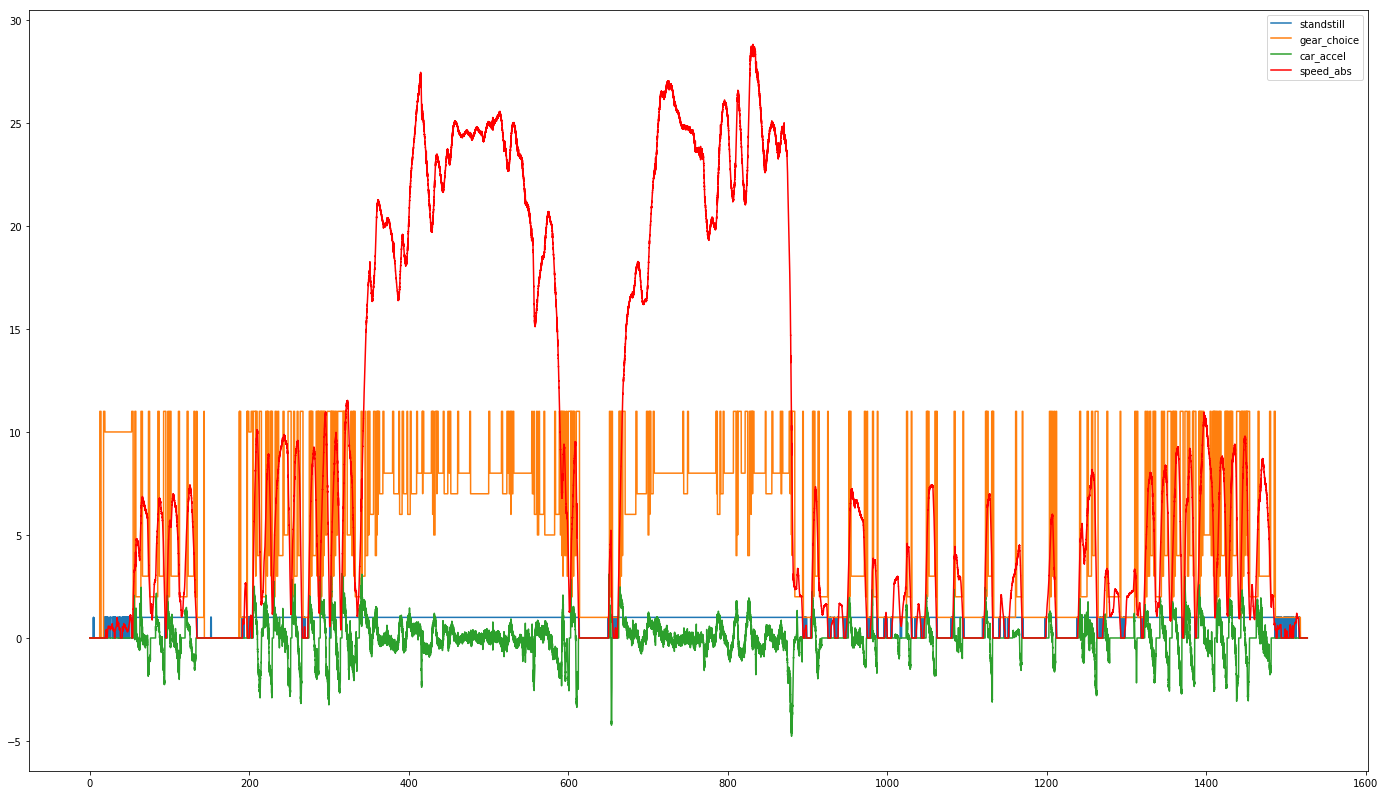

In [7]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times, sample.standstill)
plt.plot(sample.times, sample.gear_choice)
plt.plot(sample.times, sample.car_accel)
plt.plot(sample.times, sample.speed_abs, c='r')
plt.legend()

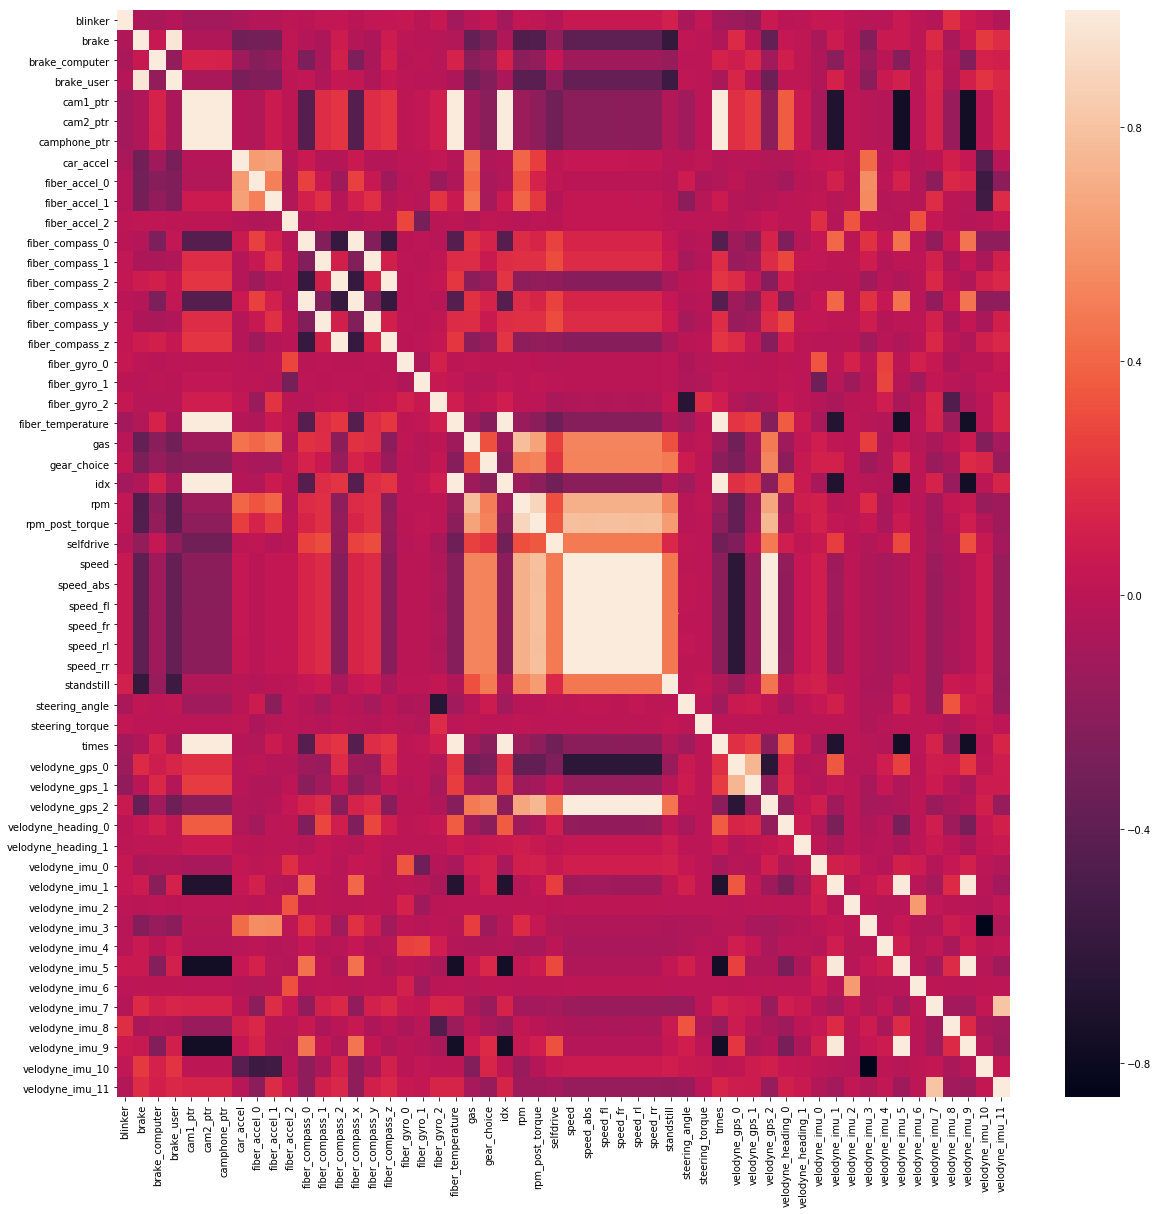

In [233]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [234]:
df.describe()

blinker          brake  brake_computer     brake_user  \
count  152650.000000  152650.000000   152650.000000  152650.000000   
mean        6.750056     334.631547       42.549672     292.081876   
std        11.865961     574.526626      127.024387     582.237325   
min         0.000000     -64.000000        0.000000     -64.000000   
25%         4.000000       0.000000        0.000000       0.000000   
50%         4.000000       0.000000        0.000000       0.000000   
75%         4.000000     456.721363        0.000000     246.301098   
max        68.000000    3856.000000      614.000000    3856.000000   

            cam1_ptr       cam2_ptr   camphone_ptr      car_accel  \
count  152650.000000  152650.000000  152650.000000  152650.000000   
mean    15267.822692   15263.352257   22772.098800      -0.021006   
std      8816.092826    8812.799096   13147.861501       0.753241   
min         0.000000       0.000000       0.000000      -4.767932   
25%      7633.000000    7631.000000   11385.833086      -0.133633   
50%     15268.000000   15263.500000   22772.194300       0.000000   
75%     22903.000000   22895.000000   34158.372334       0.127648   
max     30537.000000   30527.000000   45544.000000       3.125285   

       fiber_accel_0  fiber_accel_1  ...  velodyne_imu_2  velodyne_imu_3  \
count  152650.000000  152650.000000  ...   152650.000000   152650.000000   
mean        0.347880       0.073085  ...      791.590508     2648.786666   
std         0.789844       0.820005  ...       92.955738     1762.932573   
min        -6.995340      -7.204732  ...       14.000000        0.000000   
25%        -0.060611      -0.261019  ...      775.057144      194.936731   
50%         0.360794       0.062531  ...      791.497354     3941.999663   
75%         0.815764       0.512484  ...      806.534982     4039.076691   
max        10.553655       9.266323  ...     4081.000000     4095.000000   

       velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  velodyne_imu_7  \
count   152650.000000   152650.000000   152650.000000   152650.000000   
mean      3248.286779       89.853978      785.715461     2622.346940   
std       1462.562746       15.900711       97.968634     1778.760707   
min          0.000000       67.181092        3.032728        0.000000   
25%       2984.809857       76.866891      769.000000      152.948102   
50%       4074.000000       84.825126      785.660045     3990.541702   
75%       4083.584130      107.000000      801.495759     4069.710823   
max       4095.000000      122.007321     4094.000000     4095.000000   

       velodyne_imu_8  velodyne_imu_9  velodyne_imu_10  velodyne_imu_11  
count   152650.000000   152650.000000    152650.000000    152650.000000  
mean       131.161414      117.259951      1399.422894      2717.659633  
std        433.119131       16.106536      1748.419969      1751.530112  
min          0.000000       93.284157         0.000000         0.000000  
25%         70.227796      103.753251        54.712443       312.822983  
50%         79.026304      112.272861       145.640377      4012.600483  
75%         87.975381      135.000000      3870.675882      4069.543018  
max       4095.000000      148.000000      4095.000000      4095.000000  

[8 rows x 54 columns]

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152650 entries, 0 to 152649
Data columns (total 54 columns):
blinker               152650 non-null float64
brake                 152650 non-null float64
brake_computer        152650 non-null float64
brake_user            152650 non-null float64
cam1_ptr              152650 non-null float64
cam2_ptr              152650 non-null float64
camphone_ptr          152650 non-null float64
car_accel             152650 non-null float64
fiber_accel_0         152650 non-null float64
fiber_accel_1         152650 non-null float64
fiber_accel_2         152650 non-null float64
fiber_compass_0       152650 non-null float64
fiber_compass_1       152650 non-null float64
fiber_compass_2       152650 non-null float64
fiber_compass_x       152650 non-null float64
fiber_compass_y       152650 non-null float64
fiber_compass_z       152650 non-null float64
fiber_gyro_0          152650 non-null float64
fiber_gyro_1          152650 non-null float64
fiber_gyro_2   

In [237]:
df.isna().sum()

blinker               0
brake                 0
brake_computer        0
brake_user            0
cam1_ptr              0
cam2_ptr              0
camphone_ptr          0
car_accel             0
fiber_accel_0         0
fiber_accel_1         0
fiber_accel_2         0
fiber_compass_0       0
fiber_compass_1       0
fiber_compass_2       0
fiber_compass_x       0
fiber_compass_y       0
fiber_compass_z       0
fiber_gyro_0          0
fiber_gyro_1          0
fiber_gyro_2          0
fiber_temperature     0
gas                   0
gear_choice           0
idx                   0
rpm                   0
rpm_post_torque       0
selfdrive             0
speed                 0
speed_abs             0
speed_fl              0
speed_fr              0
speed_rl              0
speed_rr              0
standstill            0
steering_angle        0
steering_torque       0
times                 0
velodyne_gps_0        0
velodyne_gps_1        0
velodyne_gps_2        0
velodyne_heading_0    0
velodyne_heading

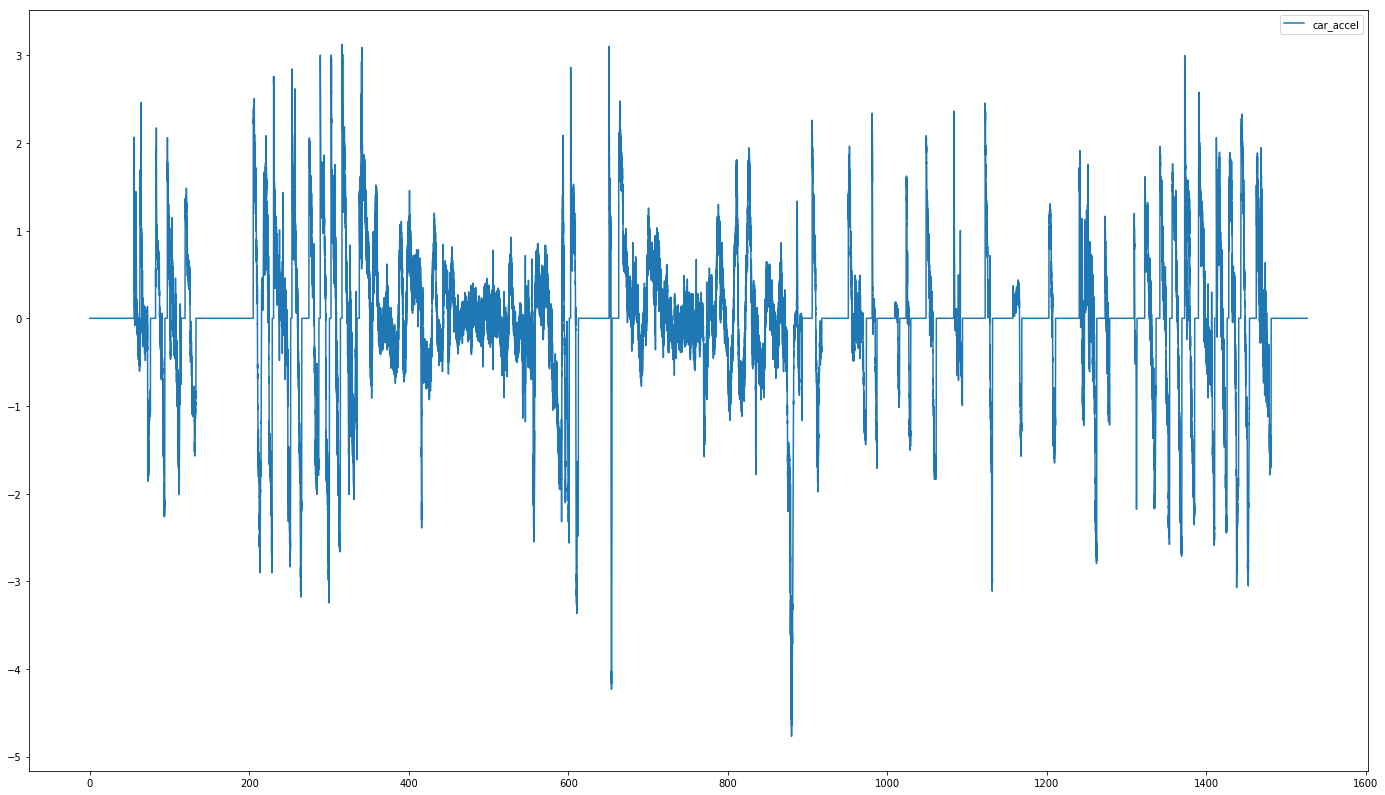

In [238]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times, sample.car_accel)
plt.legend()

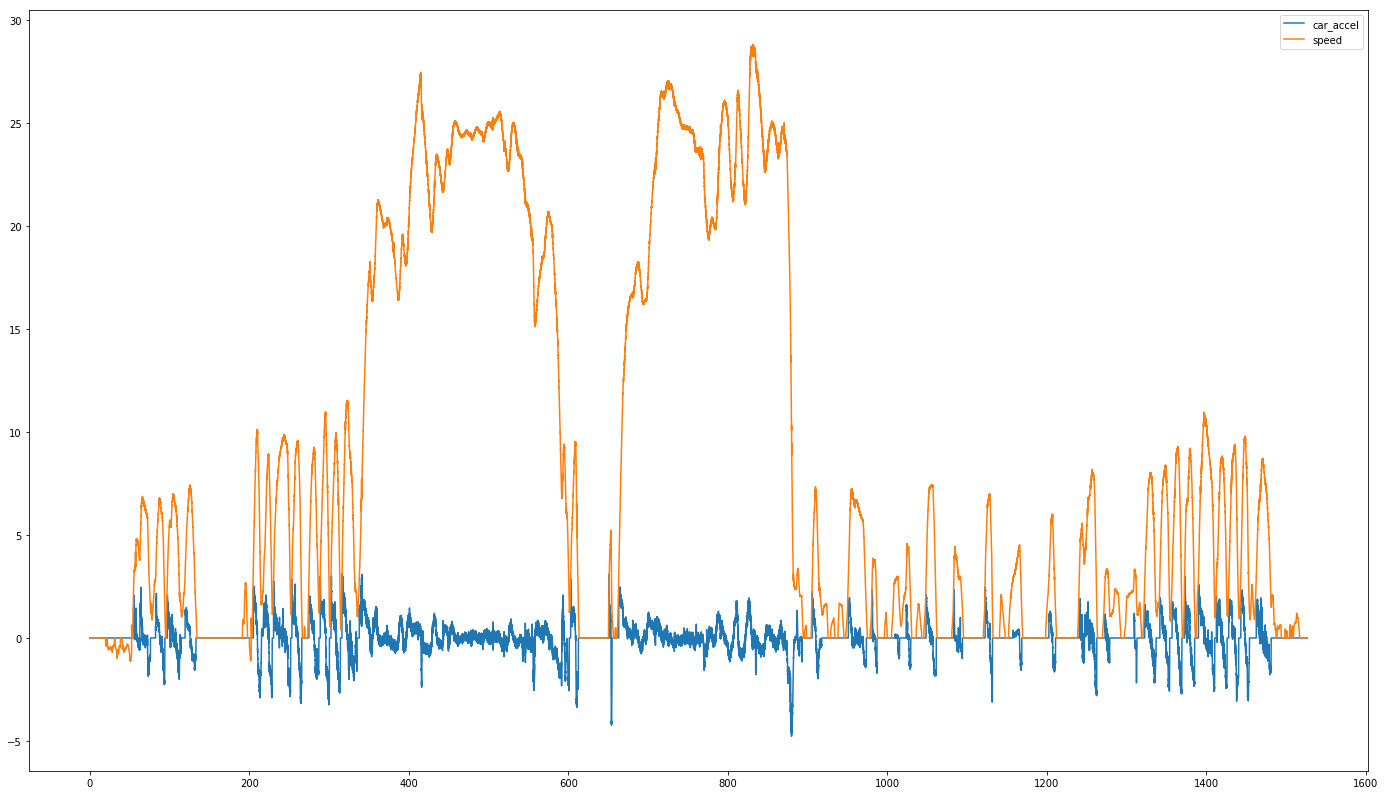

In [14]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times[limits[0]:limits[1]], sample.car_accel[limits[0]:limits[1]])
plt.plot(sample.times[limits[0]:limits[1]], sample.speed[limits[0]:limits[1]])
plt.legend()

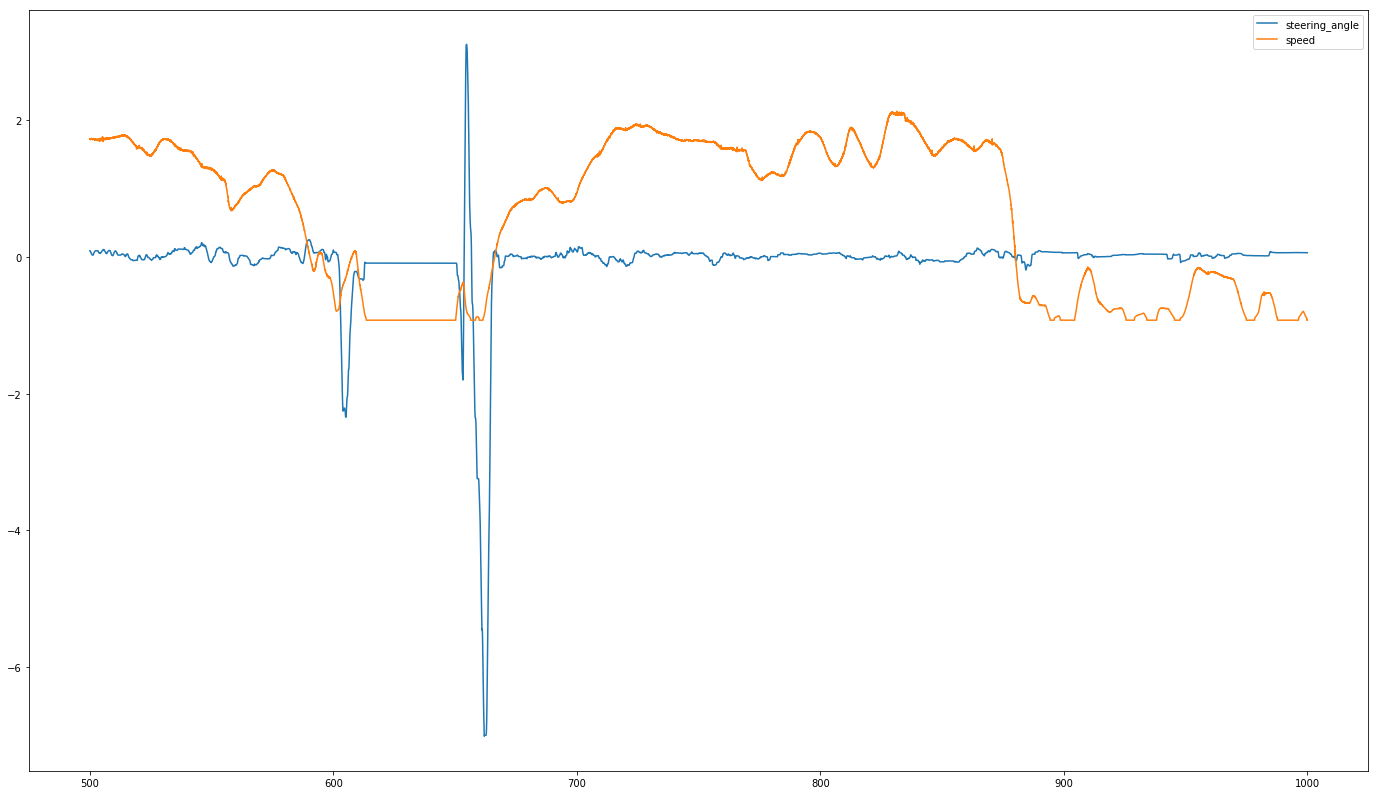

In [248]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times[50000:100000], (sample.steering_angle[50000:100000] - sample.steering_angle.mean()) / sample.steering_angle.std())
plt.plot(sample.times[50000:100000], (sample.speed[50000:100000] - sample.speed.mean()) / sample.speed.std())
plt.legend()

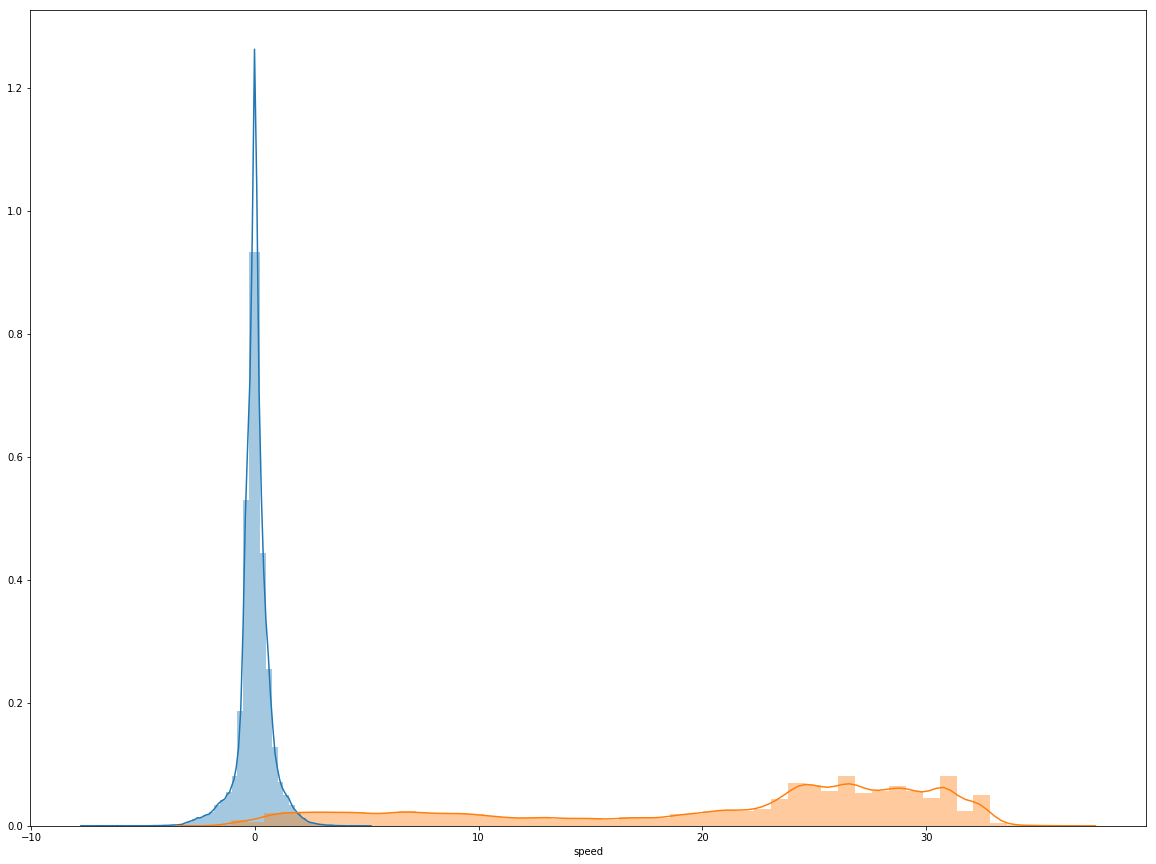

In [18]:
# Plot acceleration distribution without null values
accel_no_zero = df.car_accel[df.car_accel !=0]
speed_no_zero = df.speed[df.speed !=0]
plt.figure(figsize=(20,15))
sns.distplot(a=accel_no_zero)
sns.distplot(a=speed_no_zero)

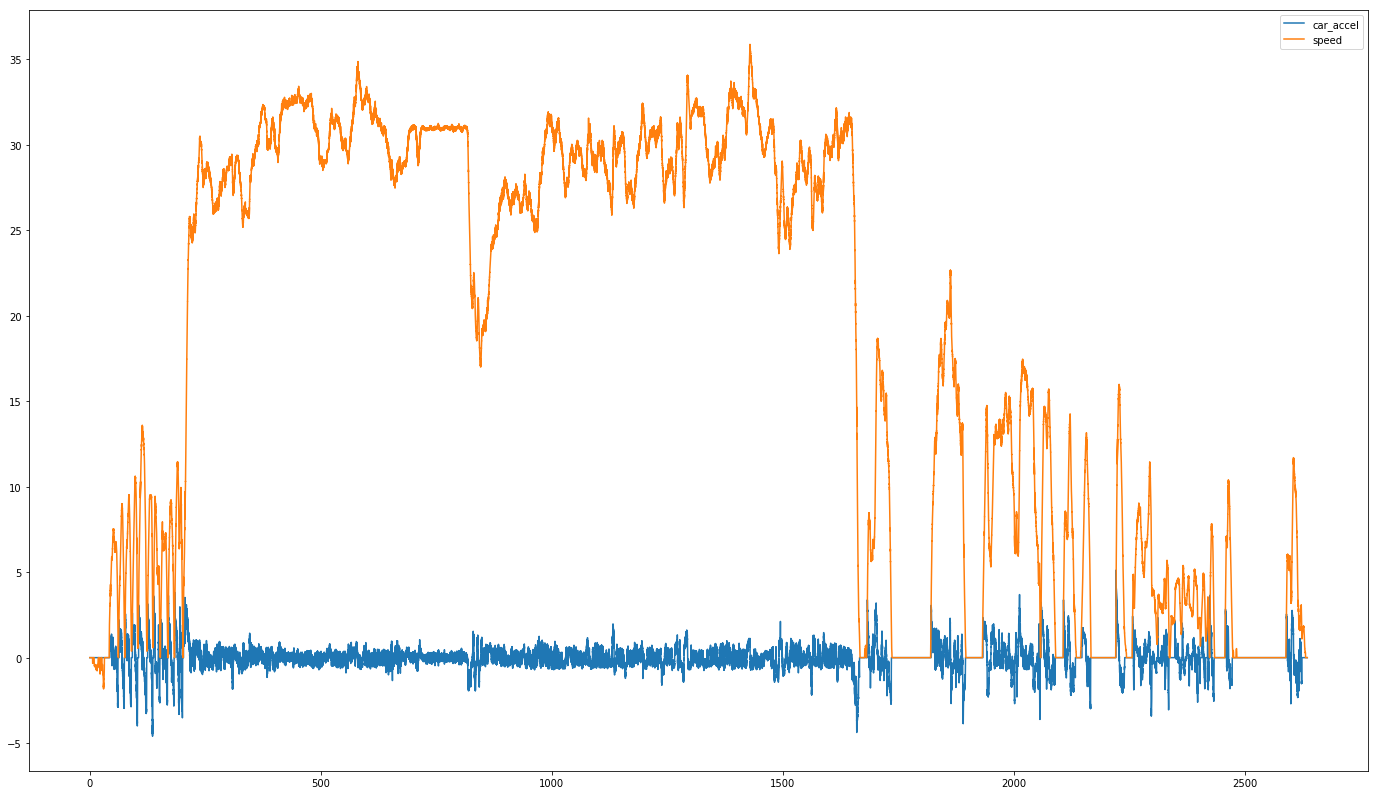

In [33]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(df1.times[limits[0]:limits[1]], df1.car_accel[limits[0]:limits[1]])
plt.plot(df1.times[limits[0]:limits[1]], df1.speed[limits[0]:limits[1]])
plt.legend()

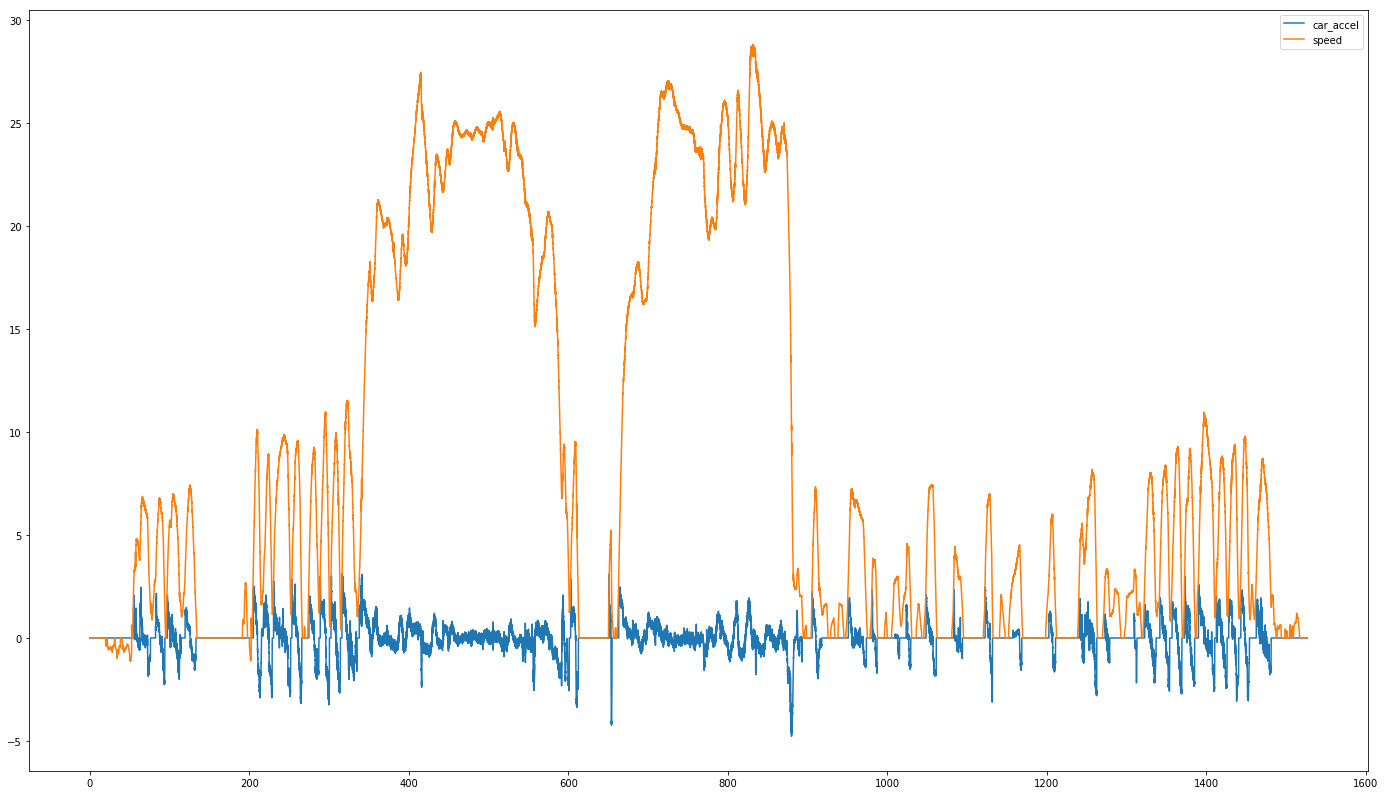

In [34]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
plt.plot(df.times[limits[0]:limits[1]], df.car_accel[limits[0]:limits[1]])
plt.plot(df.times[limits[0]:limits[1]], df.speed[limits[0]:limits[1]])
plt.legend()

In [35]:
df2 = load_dataset_as_dataframe('data/2016-06-08--11-46-01.h5')
df2.head()

blinker    brake  brake_computer  brake_user  cam1_ptr  car_accel  \
0      0.0  63872.0             0.0     63872.0       0.0        0.0   
1      0.0  63872.0             0.0     63872.0       0.0        0.0   
2      0.0  63872.0             0.0     63872.0       0.0        0.0   
3      0.0  63872.0             0.0     63872.0       0.0        0.0   
4      0.0  63872.0             0.0     63872.0       0.0        0.0   

   fiber_accel_0  fiber_accel_1  fiber_accel_2  fiber_compass_0  ...  \
0       0.574711      -0.252197       9.756913         0.119573  ...   
1       0.583070      -0.243502       9.756204         0.119573  ...   
2       0.573968      -0.244439       9.766149         0.119573  ...   
3       0.585191      -0.252392       9.769888         0.119573  ...   
4       0.589399      -0.254389       9.770599         0.119926  ...   

   velodyne_imu_2  velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  \
0      799.000000     4074.000000     4077.000000       92.000000   
1      791.000000     4074.936776     4094.430986       94.000000   
2      792.111469     4074.622294     4085.622294       93.622294   
3      794.915611     4072.203135     4080.525016       92.440627   
4      794.813155     4073.582460     4079.417540       93.000000   

   velodyne_imu_6  velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  \
0      791.000000       18.000000       87.000000      113.000000   
1      791.000000       11.000000       72.000000      114.000000   
2      785.510824       14.266237       89.356057      114.000000   
3      789.321881       13.762508       87.356238      111.678119   
4      789.208770       13.208770       82.142995      113.000000   

   velodyne_imu_10  velodyne_imu_11  
0        24.000000        13.000000  
1        25.000000        12.000000  
2        26.000000        12.622294  
3        26.678119        10.881254  
4        24.813155        13.395615  

[5 rows x 52 columns]

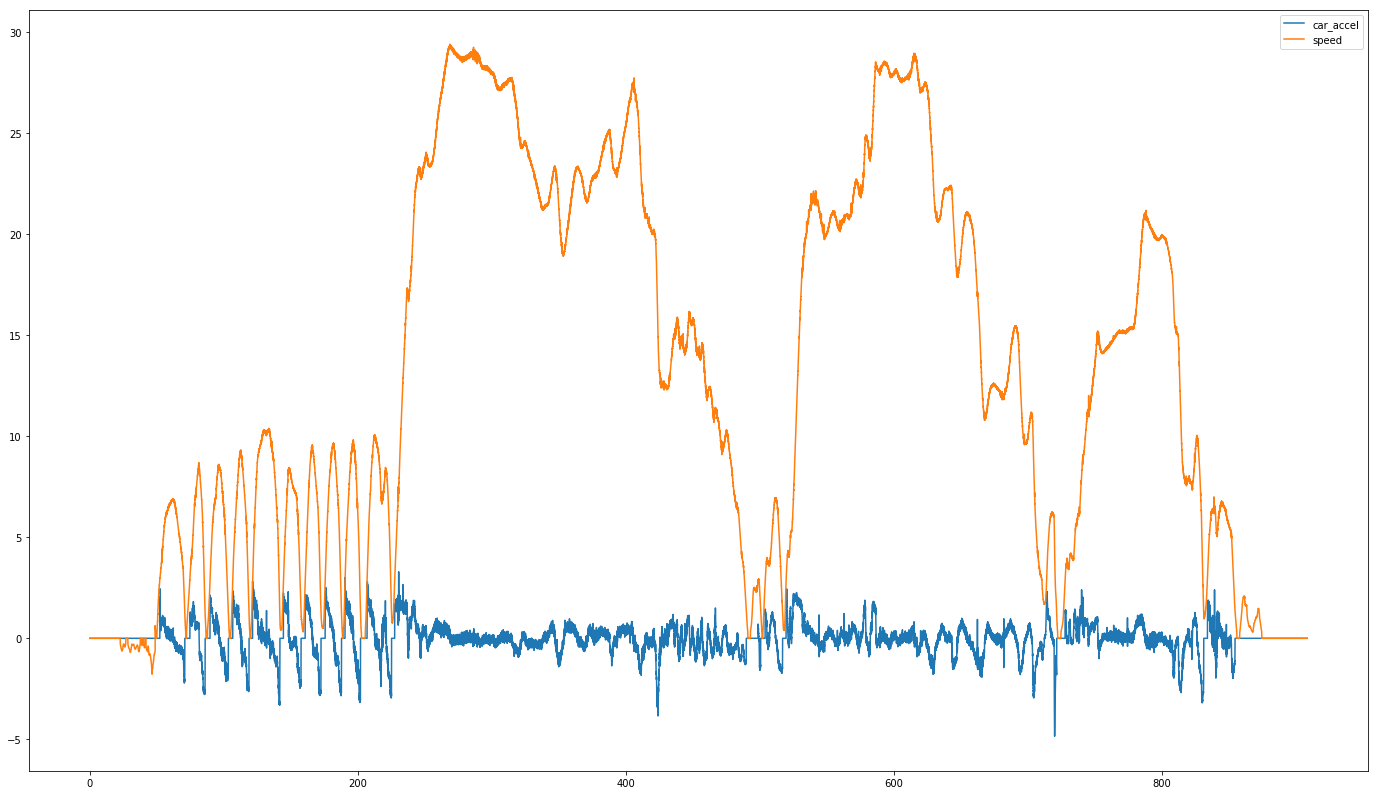

In [38]:
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df2.times[limits[0]:limits[1]], df2.car_accel[limits[0]:limits[1]])
plt.plot(df2.times[limits[0]:limits[1]], df2.speed[limits[0]:limits[1]])
plt.legend()

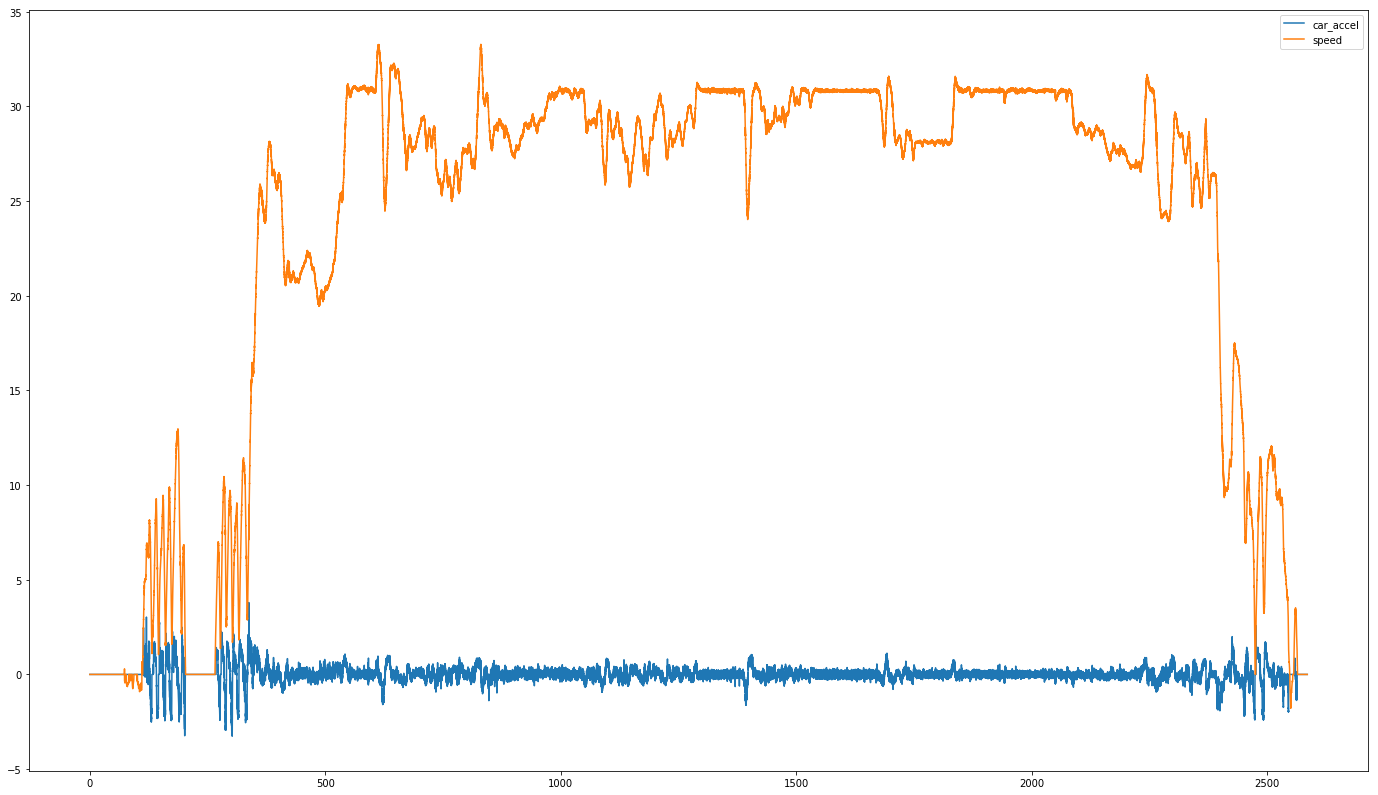

In [39]:
df3 = load_dataset_as_dataframe('data/2016-05-12--22-20-00.h5')
df3.head()
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df3.times[limits[0]:limits[1]], df3.car_accel[limits[0]:limits[1]])
plt.plot(df3.times[limits[0]:limits[1]], df3.speed[limits[0]:limits[1]])
plt.legend()

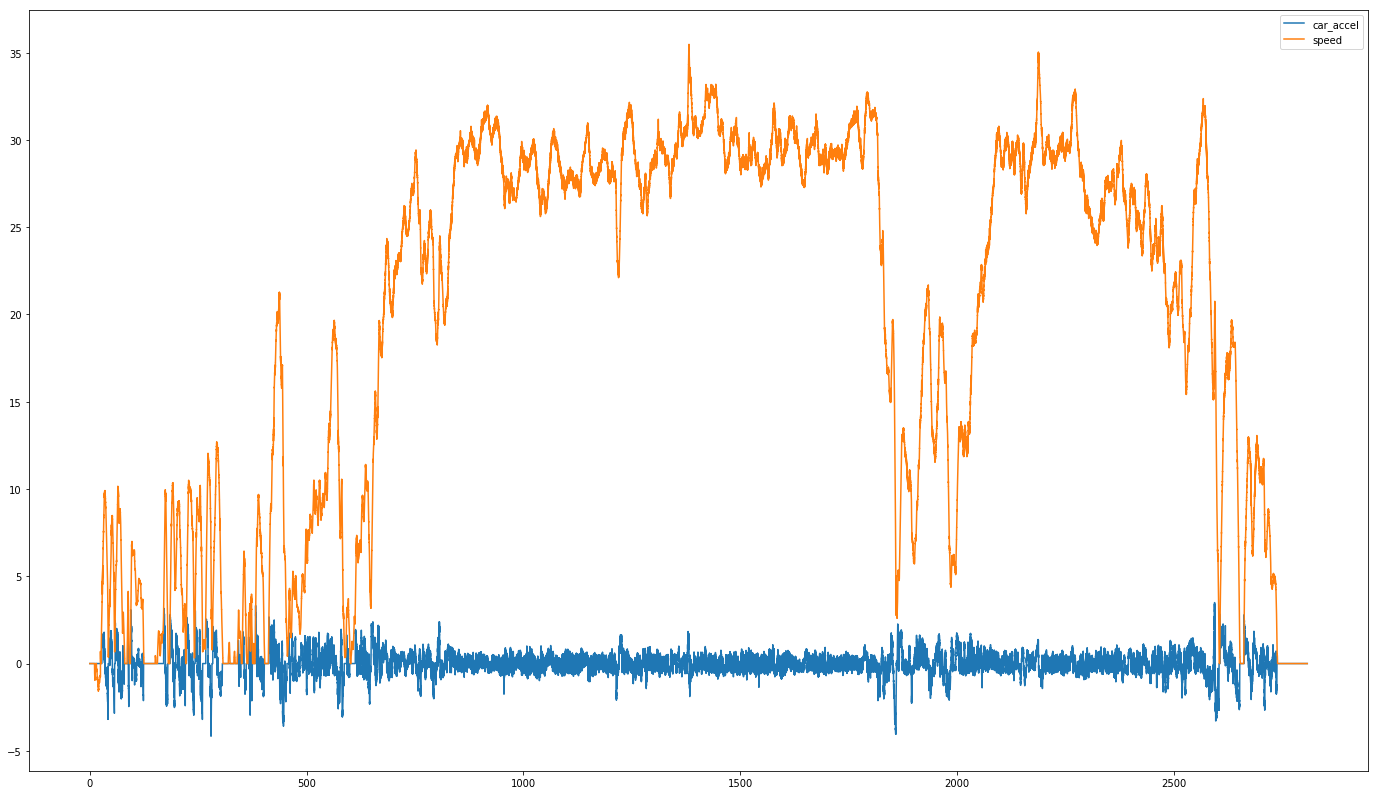

In [40]:
df4 = load_dataset_as_dataframe('data/2016-02-02--10-16-58.h5')
df4.head()
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
plt.legend()

In [19]:
brake_df = extract_brakes(df)
brake_df.head()

# brake_df.head()
# limits = (0, 5000000)
# plt.figure(figsize=(24,14))
# plt.plot(brake_df.times[limits[0]:limits[1]], brake_df.speed[limits[0]:limits[1]])
# # plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
# # plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
# plt.legend()

app_accel_0  app_accel_1  app_accel_2  app_angular_v_0  app_angular_v_1  \
2753          NaN          NaN          NaN              NaN              NaN   
2754          NaN          NaN          NaN              NaN              NaN   
2755          NaN          NaN          NaN              NaN              NaN   
2756          NaN          NaN          NaN              NaN              NaN   
2757          NaN          NaN          NaN              NaN              NaN   

      app_angular_v_2  app_heading  app_pitch  app_pos_0  app_pos_1  ...  \
2753              NaN          NaN        NaN        NaN        NaN  ...   
2754              NaN          NaN        NaN        NaN        NaN  ...   
2755              NaN          NaN        NaN        NaN        NaN  ...   
2756              NaN          NaN        NaN        NaN        NaN  ...   
2757              NaN          NaN        NaN        NaN        NaN  ...   

      velodyne_imu_10  velodyne_imu_11  velodyne_imu_2  velodyne_imu_3  \
2753      3818.000000        28.000000      924.359928      301.722770   
2754      3810.982149      4052.954873      747.991574      278.334738   
2755      3862.000000      4078.000000      876.000000      257.000000   
2756      3771.547565      4061.865794      777.680211      296.380350   
2757      3859.673215      4046.616063      770.249337      296.684906   

      velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  velodyne_imu_7  \
2753       11.000000       29.000000      971.000000       45.000000   
2754       12.986362       28.000000      794.819493     4053.172081   
2755        0.000000       28.000000      895.000000     4091.068616   
2756       13.350459       28.814417      751.835124     4076.968550   
2757       22.392542       27.000000      821.020079     4033.444174   

      velodyne_imu_8  velodyne_imu_9  
2753      107.000000       51.000000  
2754       90.782792       49.072403  
2755       94.196072       50.000000  
2756      106.443251       48.000000  
2757      103.005737       48.000000  

[5 rows x 92 columns]

In [67]:
brake_df[99:30000]

blinker  brake  brake_computer  brake_user  cam1_ptr  cam2_ptr  \
99         NaN    NaN             NaN         NaN       NaN       NaN   
100        NaN    NaN             NaN         NaN       NaN       NaN   
101        NaN    NaN             NaN         NaN       NaN       NaN   
102        NaN    NaN             NaN         NaN       NaN       NaN   
103        NaN    NaN             NaN         NaN       NaN       NaN   
104        NaN    NaN             NaN         NaN       NaN       NaN   
105        NaN    NaN             NaN         NaN       NaN       NaN   
106        NaN    NaN             NaN         NaN       NaN       NaN   
107        NaN    NaN             NaN         NaN       NaN       NaN   
108        NaN    NaN             NaN         NaN       NaN       NaN   
109        NaN    NaN             NaN         NaN       NaN       NaN   
110        NaN    NaN             NaN         NaN       NaN       NaN   
111        NaN    NaN             NaN         NaN       NaN       NaN   
112        NaN    NaN             NaN         NaN       NaN       NaN   
113        NaN    NaN             NaN         NaN       NaN       NaN   
114        NaN    NaN             NaN         NaN       NaN       NaN   
115        NaN    NaN             NaN         NaN       NaN       NaN   
116        NaN    NaN             NaN         NaN       NaN       NaN   
117        NaN    NaN             NaN         NaN       NaN       NaN   
118        NaN    NaN             NaN         NaN       NaN       NaN   
119        NaN    NaN             NaN         NaN       NaN       NaN   
120        NaN    NaN             NaN         NaN       NaN       NaN   
121        NaN    NaN             NaN         NaN       NaN       NaN   
122        NaN    NaN             NaN         NaN       NaN       NaN   
123        NaN    NaN             NaN         NaN       NaN       NaN   
124        NaN    NaN             NaN         NaN       NaN       NaN   
125        NaN    NaN             NaN         NaN       NaN       NaN   
126        NaN    NaN             NaN         NaN       NaN       NaN   
127        NaN    NaN             NaN         NaN       NaN       NaN   
128        NaN    NaN             NaN         NaN       NaN       NaN   
...        ...    ...             ...         ...       ...       ...   
29970      NaN    NaN             NaN         NaN       NaN       NaN   
29971      NaN    NaN             NaN         NaN       NaN       NaN   
29972      NaN    NaN             NaN         NaN       NaN       NaN   
29973      NaN    NaN             NaN         NaN       NaN       NaN   
29974      NaN    NaN             NaN         NaN       NaN       NaN   
29975      NaN    NaN             NaN         NaN       NaN       NaN   
29976      NaN    NaN             NaN         NaN       NaN       NaN   
29977      NaN    NaN             NaN         NaN       NaN       NaN   
29978      NaN    NaN             NaN         NaN       NaN       NaN   
29979      NaN    NaN             NaN         NaN       NaN       NaN   
29980      NaN    NaN             NaN         NaN       NaN       NaN   
29981      NaN    NaN             NaN         NaN       NaN       NaN   
29982      NaN    NaN             NaN         NaN       NaN       NaN   
29983      NaN    NaN             NaN         NaN       NaN       NaN   
29984      NaN    NaN             NaN         NaN       NaN       NaN   
29985      NaN    NaN             NaN         NaN       NaN       NaN   
29986      NaN    NaN             NaN         NaN       NaN       NaN   
29987      NaN    NaN             NaN         NaN       NaN       NaN   
29988      NaN    NaN             NaN         NaN       NaN       NaN   
29989      NaN    NaN             NaN         NaN       NaN       NaN   
29990      NaN    NaN             NaN         NaN       NaN       NaN   
29991      NaN    NaN             NaN         NaN       NaN       NaN   
29992      NaN    NaN             NaN         NaN       NaN      

In [65]:
brake_df.count(), df4.count()

(blinker               0
 brake                 0
 brake_computer        0
 brake_user            0
 cam1_ptr              0
 cam2_ptr              0
 camphone_ptr          0
 car_accel             0
 fiber_accel_0         0
 fiber_accel_1         0
 fiber_accel_2         0
 fiber_compass_0       0
 fiber_compass_1       0
 fiber_compass_2       0
 fiber_compass_x       0
 fiber_compass_y       0
 fiber_compass_z       0
 fiber_gyro_0          0
 fiber_gyro_1          0
 fiber_gyro_2          0
 fiber_temperature     0
 gas                   0
 gear_choice           0
 gps_1_fix             0
 gps_1_pos_0           0
 gps_1_pos_1           0
 gps_1_pos_2           0
 gps_1_vel_0           0
 gps_1_vel_1           0
 gps_1_vel_2           0
                      ..
 rpm                   0
 rpm_post_torque       0
 selfdrive             0
 speed                 0
 speed_abs             0
 speed_fl              0
 speed_fr              0
 speed_rl              0
 speed_rr              0


In [54]:
brake_df[:200]

blinker        brake  brake_computer   brake_user  cam1_ptr  cam2_ptr  \
3446      4.0   656.000000             0.0   656.000000     682.0     680.0   
3447      4.0   656.000000             0.0   656.000000     682.0     681.0   
3454      4.0   672.000000             0.0   672.000000     684.0     682.0   
3455      4.0   672.000000             0.0   672.000000     684.0     682.0   
3456      4.0   672.000000             0.0   672.000000     684.0     682.0   
3464      4.0   718.154581             0.0   718.154581     686.0     684.0   
3465      4.0   720.000000             0.0   720.000000     686.0     684.0   
3468      4.0   733.673334             0.0   733.673334     686.0     685.0   
3469      4.0   736.000000             0.0   736.000000     687.0     685.0   
3472      4.0   749.953746             0.0   749.953746     687.0     686.0   
3473      4.0   757.962339             0.0   757.962339     687.0     686.0   
3474      4.0   766.033838             0.0   766.033838     688.0     686.0   
3475      4.0   768.000000             0.0   768.000000     688.0     686.0   
3476      4.0   768.000000             0.0   768.000000     688.0     686.0   
3477      4.0   768.000000             0.0   768.000000     688.0     687.0   
3478      4.0   768.000000             0.0   768.000000     688.0     687.0   
3479      4.0   768.000000             0.0   768.000000     689.0     687.0   
3480      4.0   768.000000             0.0   768.000000     689.0     687.0   
3481      4.0   768.000000             0.0   768.000000     689.0     687.0   
3482      4.0   768.000000             0.0   768.000000     689.0     688.0   
3483      4.0   768.000000             0.0   768.000000     689.0     688.0   
3484      4.0   768.000000             0.0   768.000000     690.0     688.0   
3485      4.0   774.152392             0.0   774.152392     690.0     688.0   
3486      4.0   782.095962             0.0   782.095962     690.0     688.0   
3487      4.0   784.000000             0.0   784.000000     690.0     689.0   
3488      4.0   784.000000             0.0   784.000000     690.0     689.0   
3489      4.0   784.000000             0.0   784.000000     691.0     689.0   
3490      4.0   784.000000             0.0   784.000000     691.0     689.0   
3491      4.0   795.736954             0.0   795.736954     691.0     689.0   
3492      4.0   811.384058             0.0   811.384058     691.0     690.0   
...       ...          ...             ...          ...       ...       ...   
3634      4.0   992.000000             0.0   992.000000     720.0     718.0   
3635      4.0   992.000000             0.0   992.000000     720.0     718.0   
3636      4.0   992.000000             0.0   992.000000     720.0     718.0   
3637      4.0   998.269169             0.0   998.269169     720.0     719.0   
3638      4.0  1006.741120             0.0  1006.741120     720.0     719.0   
3639      4.0  1008.000000             0.0  1008.000000     721.0     719.0   
3640      4.0  1008.000000             0.0  1008.000000     721.0     719.0   
3641      4.0  1001.344388             0.0  1001.344388     721.0     719.0   
3642      4.0   993.818863             0.0   993.818863     721.0     720.0   
3643      4.0   992.000000             0.0   992.000000     721.0     720.0   
3644      4.0   992.000000             0.0   992.000000     722.0     720.0   
3645      4.0   992.000000             0.0   992.000000     722.0     720.0   
3646      4.0   992.000000             0.0   992.000000     722.0     720.0   
3647      4.0   992.000000             0.0   992.000000     722.0     721.0   
3648      4.0   992.000000             0.0   992.000000     722.0     721.0   
3649      4.0   992.000000             0.0   992.000000     723.0     721.0   
3650      4.0   992.000000             0.0   992.000000     723.0     721.0   
3651      4.0   992.000000             0.0   992.000000     723.0     721.0   
3652      4.0   992.000000             0.0   992.000000 

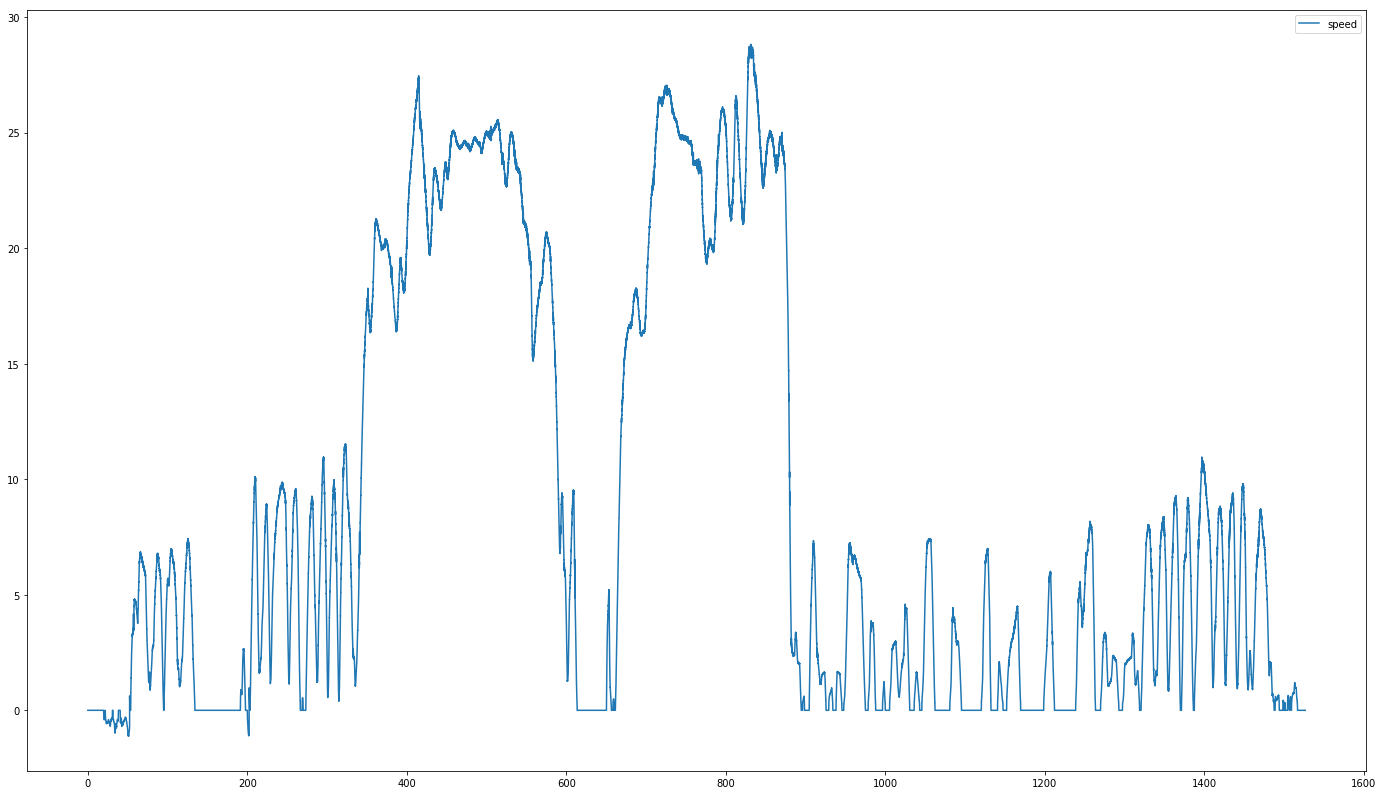

In [56]:
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df.times[limits[0]:limits[1]], df.speed[limits[0]:limits[1]])
# plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
# plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
plt.legend()

In [100]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4], 'A': [1, 1, 2, np.nan, 4]})
df.expanding(3).mean()

B         A
0   NaN       NaN
1   NaN       NaN
2  1.00  1.333333
3  1.00  1.333333
4  1.75  2.000000

In [101]:
ext_df = df1[:10000]
ext_df.head()

blinker    brake  brake_computer  brake_user  cam1_ptr  cam2_ptr  \
0      0.0  63872.0             0.0     63872.0       0.0       0.0   
1      0.0  63872.0             0.0     63872.0       0.0       0.0   
2      0.0  63872.0             0.0     63872.0       0.0       0.0   
3      0.0  63872.0             0.0     63872.0       0.0       0.0   
4      0.0  63872.0             0.0     63872.0       0.0       0.0   

   camphone_ptr  car_accel  fiber_accel_0  fiber_accel_1  ...  velodyne_imu_2  \
0           0.0        0.0       0.313100      -0.047527  ...       28.000000   
1           0.0        0.0       0.619745      -0.111516  ...       23.074187   
2           0.0        0.0       0.589704      -0.088468  ...       23.134382   
3           0.0        0.0       0.594371      -0.097445  ...       25.895667   
4           0.0        0.0       0.612610      -0.128938  ...       23.229115   

   velodyne_imu_3  velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  \
0      228.000000        3.000000      236.000000       14.000000   
1      226.358062        3.000000      236.820969       18.925813   
2      228.798428      232.471064      236.798428       20.865618   
3      231.895667      252.860890      236.034778       18.104333   
4      226.458231       25.787456      236.000000       21.694513   

   velodyne_imu_7  velodyne_imu_8  velodyne_imu_9  velodyne_imu_10  \
0       22.000000       90.000000      250.000000        31.000000   
1       19.537094       99.851625      247.537094        35.925813   
2       18.865618      116.134382      246.134382        34.000000   
3       15.069555      121.069555      250.000000        33.034778   
4       15.923628      126.778052      247.152744        34.229115   

   velodyne_imu_11  
0        17.000000  
1        15.358062  
2        14.932809  
3        12.965222  
4        13.000000  

[5 rows x 77 columns]

In [102]:
ext_df.expanding(100).mean()

blinker        brake  brake_computer   brake_user    cam1_ptr  \
0          NaN          NaN             NaN          NaN         NaN   
1          NaN          NaN             NaN          NaN         NaN   
2          NaN          NaN             NaN          NaN         NaN   
3          NaN          NaN             NaN          NaN         NaN   
4          NaN          NaN             NaN          NaN         NaN   
5          NaN          NaN             NaN          NaN         NaN   
6          NaN          NaN             NaN          NaN         NaN   
7          NaN          NaN             NaN          NaN         NaN   
8          NaN          NaN             NaN          NaN         NaN   
9          NaN          NaN             NaN          NaN         NaN   
10         NaN          NaN             NaN          NaN         NaN   
11         NaN          NaN             NaN          NaN         NaN   
12         NaN          NaN             NaN          NaN         NaN   
13         NaN          NaN             NaN          NaN         NaN   
14         NaN          NaN             NaN          NaN         NaN   
15         NaN          NaN             NaN          NaN         NaN   
16         NaN          NaN             NaN          NaN         NaN   
17         NaN          NaN             NaN          NaN         NaN   
18         NaN          NaN             NaN          NaN         NaN   
19         NaN          NaN             NaN          NaN         NaN   
20         NaN          NaN             NaN          NaN         NaN   
21         NaN          NaN             NaN          NaN         NaN   
22         NaN          NaN             NaN          NaN         NaN   
23         NaN          NaN             NaN          NaN         NaN   
24         NaN          NaN             NaN          NaN         NaN   
25         NaN          NaN             NaN          NaN         NaN   
26         NaN          NaN             NaN          NaN         NaN   
27         NaN          NaN             NaN          NaN         NaN   
28         NaN          NaN             NaN          NaN         NaN   
29         NaN          NaN             NaN          NaN         NaN   
...        ...          ...             ...          ...         ...   
9970  9.433557  2096.283067        1.685974  2094.597093  989.433557   
9971  9.433012  2096.134292        1.685805  2094.448487  989.533594   
9972  9.432468  2095.986366        1.685636  2094.300729  989.633611   
9973  9.431923  2095.839251        1.685467  2094.153784  989.733607   
9974  9.431378  2095.692926        1.685298  2094.007628  989.833584   
9975  9.430834  2095.547007        1.685129  2093.861878  989.933641   
9976  9.430290  2095.401117        1.684960  2093.716156  990.033677   
9977  9.429745  2095.255256        1.684791  2093.570464  990.133694   
9978  9.429201  2095.109424        1.684623  2093.424801  990.233691   
9979  9.428657  2094.963621        1.684454  2093.279168  990.333667   
9980  9.428113  2094.817848        1.684285  2093.133563  990.433724   
9981  9.427570  2094.672598        1.684116  2092.988482  990.533761   
9982  9.427026  2094.528156        1.683948  2092.844208  990.633777   
9983  9.426482  2094.384546        1.683779  2092.700767  990.733774   
9984  9.425939  2094.241788        1.683610  2092.558178  990.833751   
9985  9.425396  2094.099365        1.683442  2092.415923  990.933807   
9986  9.424852  2093.956970        1.683273  2092.273697  991.033844   
9987  9.424309  2093.815455        1.683105  2092.132350  991.133861   
9988  9.423766  2093.675545        1.682936  2091.992609  991.233857   
9989  9.423223  2093.536439        1.682768  2091.853671  991.333834   
9990  9.422680  2093.397360        1.682599  2091.714760  991.433891   
9991  9.422138  2093.258727        1.682431  2091.576296  991.533927   
9992  9.421595  2093.120896        1.682262  2091.438633  991.633944   
9993  9.421053  2092.983897        1.682094  20

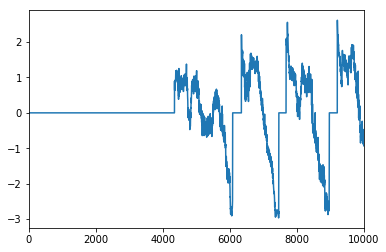

In [87]:
ext_df.dropna().car_accel.plot()

In [259]:
test_df = extract_brakes(df, 10, -2)
# test_df.car_accel.plot()

In [150]:
test_df.speed.tail()

1036670    7.277091
1036671    7.256643
1036672    7.219023
1036673    7.178171
1036674    7.152454
Name: speed, dtype: float64

In [151]:
df.speed.tail()

1046454    0.0
1046455    0.0
1046456    0.0
1046457    0.0
1046458    0.0
Name: speed, dtype: float64

In [152]:
df.take(range(0, len(df), 100))

blinker        brake  brake_computer   brake_user  cam1_ptr  \
0            0.0     0.000000             0.0     0.000000       0.0   
100          4.0     0.000000             0.0     0.000000      19.0   
200          4.0     0.000000             0.0     0.000000      39.0   
300          4.0     0.000000             0.0     0.000000      59.0   
400          4.0     0.000000             0.0     0.000000      79.0   
500          4.0     0.000000             0.0     0.000000      99.0   
600          4.0     0.000000             0.0     0.000000     119.0   
700          4.0     0.000000             0.0     0.000000     139.0   
800          4.0     0.000000             0.0     0.000000     159.0   
900          4.0     0.000000             0.0     0.000000     179.0   
1000         4.0     0.000000             0.0     0.000000     199.0   
1100         4.0   181.284294             0.0   181.284294     219.0   
1200         4.0   240.000000             0.0   240.000000     239.0   
1300         4.0   176.000000             0.0   176.000000     259.0   
1400         4.0   288.000000             0.0   288.000000     279.0   
1500         4.0   298.094040             0.0   298.094040     299.0   
1600         4.0  1305.787348             0.0  1305.787348     319.0   
1700         4.0  3835.127883             0.0  3835.127883     339.0   
1800         4.0  1746.788311             0.0  1746.788311     359.0   
1900         4.0   112.000000             0.0   112.000000     379.0   
2000         4.0    16.000000             0.0    16.000000     399.0   
2100         4.0   384.000000             0.0   384.000000     419.0   
2200         4.0    48.000000             0.0    48.000000     439.0   
2300         4.0   144.000000             0.0   144.000000     459.0   
2400         4.0    96.000000             0.0    96.000000     479.0   
2500         4.0   224.000000             0.0   224.000000     499.0   
2600         4.0    32.000000             0.0    32.000000     519.0   
2700         4.0   250.764101             0.0   250.764101     539.0   
2800         4.0   454.321071             0.0   454.321071     559.0   
2900         4.0   228.134519             0.0   228.134519     579.0   
...          ...          ...             ...          ...       ...   
1043500      4.0   816.000000             0.0   816.000000   55574.0   
1043600      4.0   816.000000             0.0   816.000000   55594.0   
1043700      4.0   816.000000             0.0   816.000000   55614.0   
1043800      4.0   821.432880             0.0   821.432880   55634.0   
1043900      4.0   832.000000             0.0   832.000000   55654.0   
1044000      4.0   832.000000             0.0   832.000000   55674.0   
1044100      4.0   832.000000             0.0   832.000000   55694.0   
1044200      4.0   848.000000             0.0   848.000000   55714.0   
1044300      4.0   848.000000             0.0   848.000000   55734.0   
1044400      4.0   848.000000             0.0   848.000000   55754.0   
1044500      4.0   864.000000             0.0   864.000000   55774.0   
1044600      4.0   864.000000             0.0   864.000000   55794.0   
1044700      4.0   880.000000             0.0   880.000000   55814.0   
1044800      4.0   880.000000             0.0   880.000000   55834.0   
1044900      4.0   884.723879             0.0   884.723879   55854.0   
1045000      4.0   928.000000             0.0   928.000000   55874.0   
1045100      4.0   944.000000             0.0   944.000000   55894.0   
1045200      4.0   960.000000             0.0   960.000000   55914.0   
1045300      4.0   960.000000             0.0   960.000000   55934.0   
1045400      4.0   976.000000             0.0   976.000000   55954.0   
1045500      4.0   976.000000             0.0   976.000000   55974.0   
1045600      4.0   992.000000             0.0   992.000000   55994.0   
1045700      4.0   992.000000             0.0   992.000000   56014.0   
1045800      4.0   992.000000             0.0   9

In [157]:
4*3600/1000

14.4

In [257]:
test_df1 = test_df
test_df = test_df1[:]
test_df.head()

level_0   index  blinker        brake  brake_computer   brake_user  \
0        0  508090     68.0  1617.970265             0.0  1617.970265   
1        1  508091     68.0  1648.611048             0.0  1648.611048   
2        2  508092     68.0  1664.945797             0.0  1664.945797   
3        3  508093     68.0  1681.174288             0.0  1681.174288   
4        4  508094     68.0  1696.153611             0.0  1696.153611   

   cam1_ptr  cam2_ptr  camphone_ptr  car_accel  ...  velodyne_imu_10  \
0    1192.0    1189.0   1756.575596  -2.017942  ...       227.946890   
1    1192.0    1189.0   1756.853620  -2.079415  ...       165.000000   
2    1193.0    1189.0   1757.147817  -2.062365  ...       236.000000   
3    1193.0    1189.0   1757.459995  -2.045315  ...       200.682179   
4    1193.0    1190.0   1757.772173  -2.037543  ...       218.904262   

   velodyne_imu_11  velodyne_imu_2  velodyne_imu_3  velodyne_imu_4  \
0       229.027012       48.682549       28.448558      226.011838   
1        24.000000       28.000000       90.470547      158.191851   
2        23.000000       58.989556       38.979112      247.409942   
3        21.974461       25.788876       49.027809      239.183314   
4        39.967306       50.540572       58.673672      237.170461   

   velodyne_imu_5  velodyne_imu_6  velodyne_imu_7  velodyne_imu_8  \
0      250.000000       61.481032        5.728073      103.992413   
1      250.000000       39.000000       39.000000       95.000000   
2      248.000000       80.000000       16.000000      106.000000   
3      248.078888       45.183314       37.422247       95.129966   
4      249.237011       59.118506       17.814945      115.866900   

   velodyne_imu_9  
0       10.899241  
1       10.000000  
2       13.000000  
3       11.236663  
4       12.000000  

[5 rows x 79 columns]

(-5, 30)

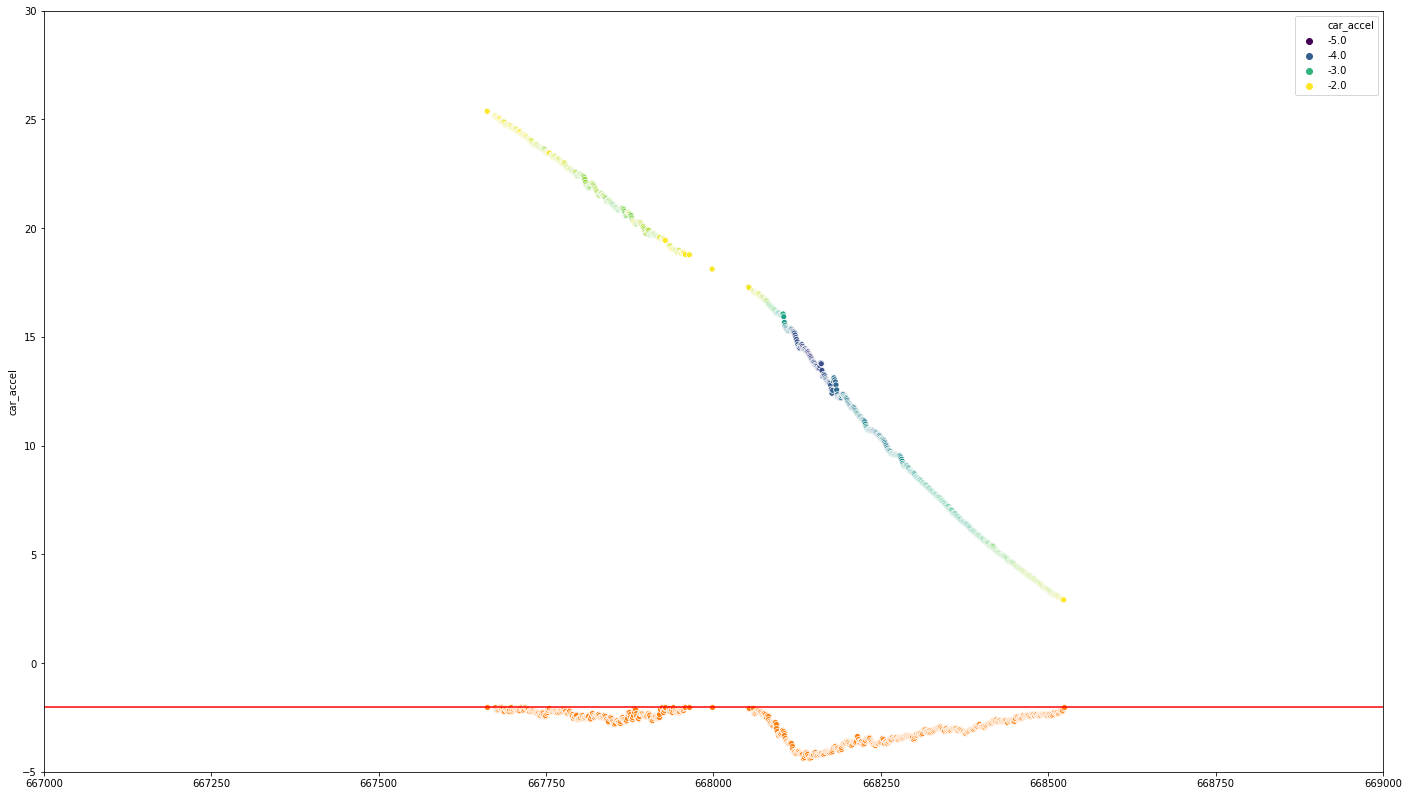

In [241]:
fig, ax = plt.subplots(figsize=(24,14))
# sns.distplot(d, ax=ax)
sns.scatterplot(x=test_df.index, y=test_df.speed, hue=test_df.car_accel, ax=ax, palette='viridis')
sns.scatterplot(x=test_df.index, y=test_df.car_accel, ax=ax)
sns.lineplot(x='x', y='y', data={'x': [0,max(test_df.index)], 'y': [-threshold,-threshold]}, color='r', ax=ax)
ax.set_xlim([667000,669000])
ax.set_ylim([-5, 30])

# ax2 = plt.axes([0.2, 0.6, .2, .2])
# sns.scatterplot(x=test_df.index, y=test_df.speed, ax=ax2)
# ax2.set_title('zoom')
# ax2.set_xlim([420000,430000])
# ax2.set_ylim([0, 10])

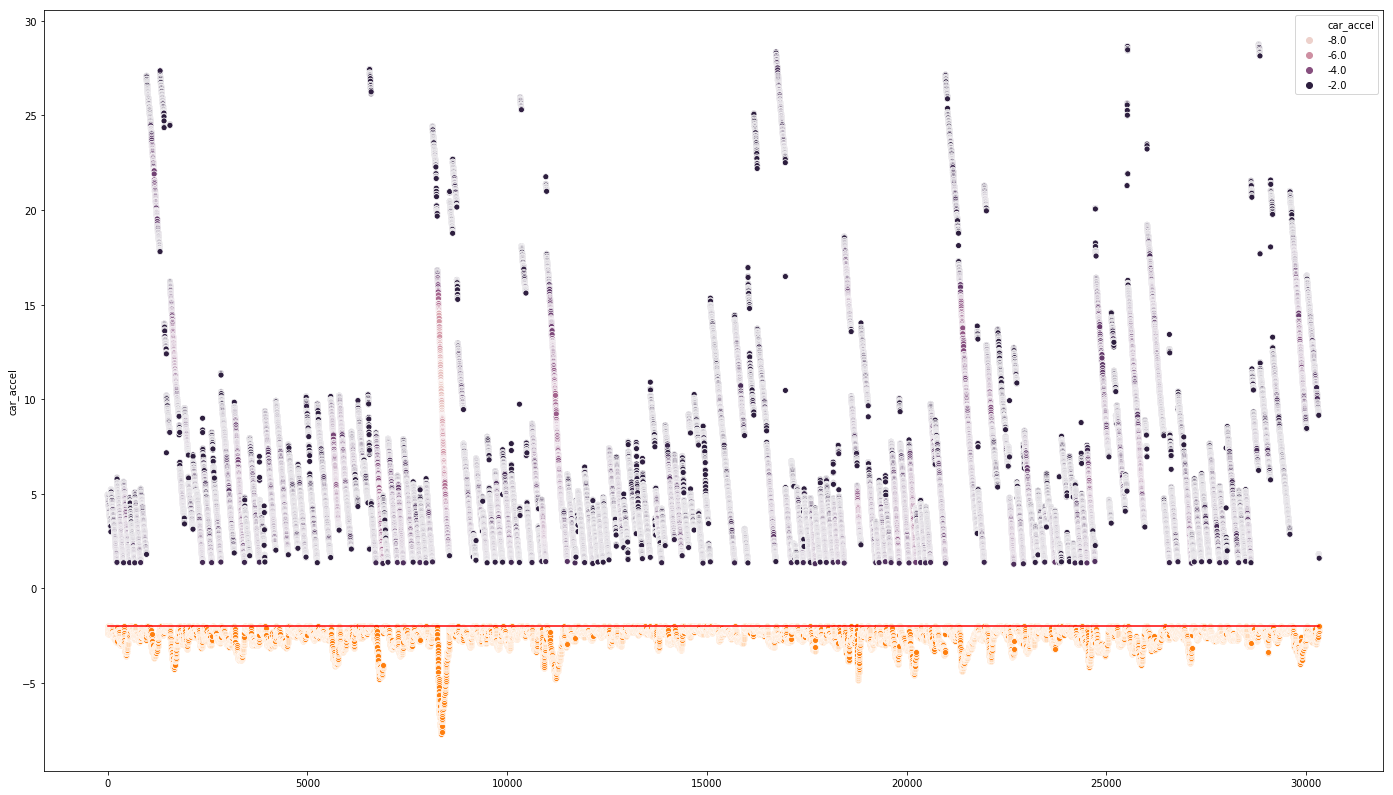

In [298]:
test_df = extract_brakes(df, 10, -2)
test_df = test_df.reset_index()
fig, ax = plt.subplots(figsize=(24,14))
# sns.distplot(d, ax=ax)
sns.scatterplot(x=test_df.index, y=test_df.speed, hue=test_df.car_accel, ax=ax)
sns.scatterplot(x=test_df.index, y=test_df.car_accel, ax=ax)
sns.lineplot(x='x', y='y', data={'x': [0,max(test_df.index)], 'y': [-threshold,-threshold]}, color='r', ax=ax)
# ax.set_xlim([500000,550000])
# ax.set_xlim([20000,35000])
# ax.set_ylim([-5, 10])

# ax2 = plt.axes([0.2, 0.6, .2, .2])
# sns.scatterplot(x=test_df.index, y=test_df.speed, ax=ax2)
# ax2.set_title('zoom')
# ax2.set_xlim([420000,430000])
# ax2.set_ylim([0, 10])


In [310]:
test_df.idx

0          2753
1          2754
2          2755
3          2756
4          2757
5          2758
6          2759
7          2760
8          2761
9          2762
10         2763
11         2764
12         2765
13         2766
14         2767
15         2768
16         2769
17         2770
18         2771
19         2772
20         2773
21         2774
22         2775
23         2776
24         2777
25         2778
26         2779
27         2780
28         2781
29         2782
          ...  
30304    384294
30305    384295
30306    384296
30307    384297
30308    384298
30309    384299
30310    384300
30311    384301
30312    384302
30313    384303
30314    384304
30315    384306
30316    384307
30317    384308
30318    384309
30319    384310
30320    384311
30321    384312
30322    384318
30323    389432
30324    389433
30325    389434
30326    389435
30327    389436
30328    389437
30329    389438
30330    389439
30331    389440
30332    389441
30333    389442
Name: idx, Length: 30334

In [311]:
test_df.index

RangeIndex(start=0, stop=30334, step=1)

In [300]:
true_df = test_df.car_accel > -2 - 0.01 

In [301]:
true_df.sum()

454

In [27]:
sum(np.abs(brake_df.idx.shift(1) - brake_df.idx) > 1000)

186

In [58]:
threshold = 2  # acceleration of breaking m/s^2
plt.figure(figsize=(30,15))
# sns.scatterplot(x=df.index, y=df.speed)
sns.scatterplot(x=df.idx, y=df.speed)
sns.scatterplot(x=brake_df.idx, y=brake_df.speed, hue=brake_df.car_accel)
sns.scatterplot(x=brake_df.idx, y=brake_df.car_accel)
# sns.lineplot(x='x', y='y', data={'x': [0,max(brake_df.index)], 'y': [-threshold,-threshold]}, color='r')
plt.legend()

Error in callback <function flush_figures at 0x11cc40730> (for post_execute):


KeyboardInterrupt: 

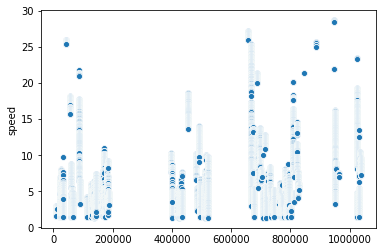

In [163]:
sns.scatterplot(x=test_df.index, y=test_df.speed)

In [147]:
len(test_df)

32592

In [148]:
test_df[50:60]

blinker        brake  brake_computer   brake_user  cam1_ptr  cam2_ptr  \
7341      4.0  1678.527192             0.0  1678.527192    1467.0    1468.0   
7342      4.0  1680.000000             0.0  1680.000000    1467.0    1468.0   
7343      4.0  1680.000000             0.0  1680.000000    1467.0    1468.0   
7344      4.0  1680.000000             0.0  1680.000000    1468.0    1468.0   
7345      4.0  1680.000000             0.0  1680.000000    1468.0    1468.0   
7346      4.0  1680.000000             0.0  1680.000000    1468.0    1469.0   
7347      4.0  1680.000000             0.0  1680.000000    1468.0    1469.0   
7349      4.0  1680.000000             0.0  1680.000000    1469.0    1469.0   
7350      4.0  1680.000000             0.0  1680.000000    1469.0    1469.0   
7351      4.0  1680.000000             0.0  1680.000000    1469.0    1470.0   

      camphone_ptr  car_accel  fiber_accel_0  fiber_accel_1  ...  \
7341   2189.814781  -1.627730      -1.888110      -2.221337  ...   
7342   2190.113133  -1.615202      -1.848903      -2.573921  ...   
7343   2190.390695  -1.565209      -1.817504      -2.499170  ...   
7344   2190.668258  -1.569997      -2.164513      -2.094546  ...   
7345   2190.945820  -1.618301      -2.094344      -2.408018  ...   
7346   2191.251375  -1.597408      -1.730591      -2.685940  ...   
7347   2191.563718  -1.503647      -1.930677      -2.329328  ...   
7349   2192.188830  -1.514230      -1.266684      -2.182655  ...   
7350   2192.501877  -1.571762      -1.939167      -1.988428  ...   
7351   2192.814925  -1.646931      -2.165120      -2.399793  ...   

      velodyne_imu_10  velodyne_imu_11  velodyne_imu_2  velodyne_imu_3  \
7341      3803.440596        83.286909      713.012179      261.773748   
7342      3811.880820        42.400684      808.000000      318.000000   
7343      3850.279692      2233.681505      719.515111      253.815881   
7344      3829.342365      4048.731079      805.025974      253.340125   
7345      3842.596605      4065.948262      768.803558      266.098221   
7346      3819.171654       784.737065      738.545071      254.600881   
7347      3864.766169        40.360888      817.296211      225.383467   
7349      3915.000000        46.000000      781.000000      147.987976   
7350      3840.000000        61.000000      756.409489      241.042837   
7351      3892.000000        59.875904      710.240956      215.737338   

      velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  velodyne_imu_7  \
7341        8.250068      117.988092      722.702572       39.845196   
7342       24.000000      118.000000      850.000000       80.000000   
7343     1851.840632      118.000000      743.000000     2245.847001   
7344     4090.536722      118.292656      779.440663     4054.438424   
7345     4093.389652      117.694826      772.958773     4062.727567   
7346      793.917348      118.000000      763.399119      810.488121   
7347     3216.635643      118.000000      822.530807       41.233831   
7349     4078.000000      116.841652      769.000000       48.000000   
7350     4068.194288      116.064763      783.000000       65.000000   
7351     4082.167873      118.000000      732.029306       59.000000   

      velodyne_imu_8  velodyne_imu_9  
7341       78.797564      146.000000  
7342       50.000000      145.000000  
7343       74.165496      143.452214  
7344       67.389834      144.000000  
7345       74.103476      143.694826  
7346       88.751056      144.613732  
7347       69.425564      145.000000  
7349       69.000000      145.000000  
7350       73.000000      144.000000  
7351       77.000000      144.000000  

[10 rows x 77 columns]

In [59]:
brake_df = extract_brakes(df, 10, -2)
brake_df.head()

app_accel_0  app_accel_1  app_accel_2  app_angular_v_0  app_angular_v_1  \
2753          NaN          NaN          NaN              NaN              NaN   
2754          NaN          NaN          NaN              NaN              NaN   
2755          NaN          NaN          NaN              NaN              NaN   
2756          NaN          NaN          NaN              NaN              NaN   
2757          NaN          NaN          NaN              NaN              NaN   

      app_angular_v_2  app_heading  app_pitch  app_pos_0  app_pos_1  ...  \
2753              NaN          NaN        NaN        NaN        NaN  ...   
2754              NaN          NaN        NaN        NaN        NaN  ...   
2755              NaN          NaN        NaN        NaN        NaN  ...   
2756              NaN          NaN        NaN        NaN        NaN  ...   
2757              NaN          NaN        NaN        NaN        NaN  ...   

      velodyne_imu_10  velodyne_imu_11  velodyne_imu_2  velodyne_imu_3  \
2753      3818.000000        28.000000      924.359928      301.722770   
2754      3810.982149      4052.954873      747.991574      278.334738   
2755      3862.000000      4078.000000      876.000000      257.000000   
2756      3771.547565      4061.865794      777.680211      296.380350   
2757      3859.673215      4046.616063      770.249337      296.684906   

      velodyne_imu_4  velodyne_imu_5  velodyne_imu_6  velodyne_imu_7  \
2753       11.000000       29.000000      971.000000       45.000000   
2754       12.986362       28.000000      794.819493     4053.172081   
2755        0.000000       28.000000      895.000000     4091.068616   
2756       13.350459       28.814417      751.835124     4076.968550   
2757       22.392542       27.000000      821.020079     4033.444174   

      velodyne_imu_8  velodyne_imu_9  
2753      107.000000       51.000000  
2754       90.782792       49.072403  
2755       94.196072       50.000000  
2756      106.443251       48.000000  
2757      103.005737       48.000000  

[5 rows x 92 columns]

In [75]:
sum(np.abs(brake_df.idx.shift(1) - brake_df.idx) > 200)

242

In [67]:
len(np.abs(brake_df.idx.shift(1) - brake_df.idx))

33432

In [68]:
len(brake_df)

33432

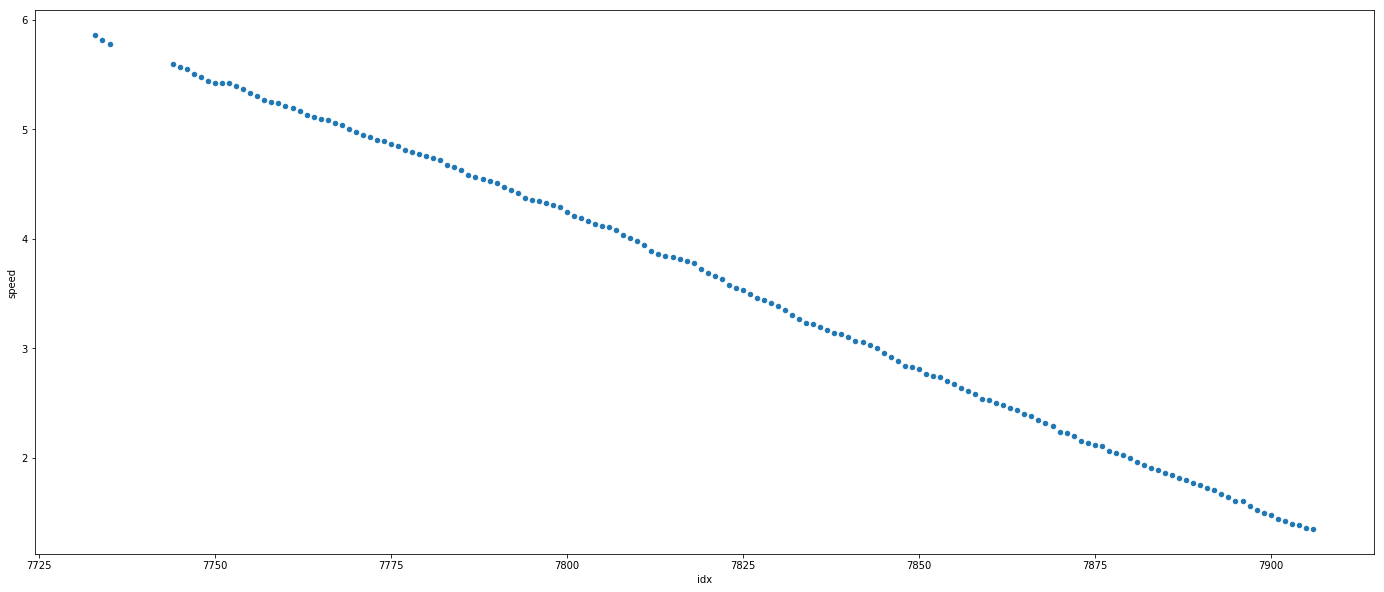

In [179]:
brake_df = extract_brake_events(df)
brake_df[232:398].plot(x='idx', y='speed' , kind='scatter', figsize=(24,10))

In [162]:
bounds = (brake_df.idx - brake_df.idx.shift()) > (2 * 100)
bounds[:82]

2753    False
2754    False
2755    False
2756    False
2757    False
2758    False
2759    False
2760    False
2761    False
2762    False
2763    False
2764    False
2765    False
2766    False
2767    False
2768    False
2769    False
2770    False
2771    False
2772    False
2773    False
2774    False
2775    False
2776    False
2777    False
2778    False
2779    False
2780    False
2781    False
2782    False
        ...  
2805    False
2806    False
2807    False
2808    False
2809    False
2810    False
2811    False
2812    False
2813    False
2814    False
2815    False
2816    False
2817    False
2818    False
2819    False
2820    False
2821    False
2822    False
2823    False
2824    False
2825    False
2826    False
2827    False
2829    False
2830    False
2831    False
2832    False
2848    False
4734     True
4735    False
Name: idx, Length: 82, dtype: bool

In [167]:
bounds2 = bounds.reset_index()
bounds2[bounds2['idx']].index

Int64Index([   80,   232,   398,   548,   677,   825,   972,  1311,  1408,
             1413,
            ...
            31786, 31914, 31949, 31951, 32213, 32214, 32265, 32698, 33118,
            33421],
           dtype='int64', length=242)

In [284]:
boundaries = extract_brake_features(df)
boundaries[0].speed.describe()

count    80.000000
mean      4.074709
std       0.509839
min       2.992993
25%       3.680761
50%       4.118825
75%       4.447415
max       4.961402
Name: speed, dtype: float64

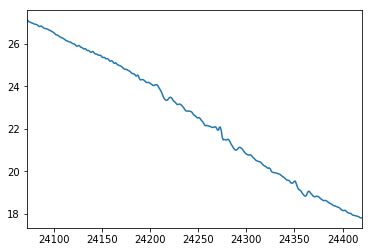

In [308]:
boundaries[7].speed.plot()

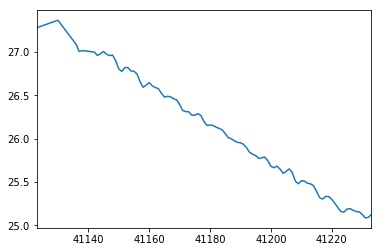

In [309]:
boundaries[8].speed.plot()

In [305]:
metrics = mdt.calculate_brake_metrics(boundaries)
# metrics_df = pd.concat(metrics, axis=1).T.reset_index()
# metrics.plot(figsize=(20,14))
metrics

index  count       mean       std        min        25%        50%  \
0        0   80.0   4.074709  0.509839   2.992993   3.680761   4.118825   
1        1  152.0   3.352545  1.116771   1.376833   2.402932   3.407959   
2        2  166.0   3.545409  1.298964   1.355006   2.409040   3.560973   
3        3  150.0   3.361155  1.270528   1.360434   2.254291   3.209100   
4        4  129.0   2.965783  0.995557   1.351605   2.096891   2.932263   
5        5  148.0   3.229391  1.082453   1.366016   2.287702   3.244603   
6        6  147.0   3.468932  1.037398   1.796617   2.495360   3.433418   
7        7  339.0  22.387512  2.831169  17.806122  19.836038  22.512644   
8        8   97.0  26.069256  0.629923  25.087311  25.512148  26.057539   
9        9   56.0  13.145102  0.495923  12.397420  12.801695  13.071677   
10      10   84.0   9.175133  0.584866   8.247942   8.629623   9.177783   
11      11  229.0  12.254338  2.211141   9.086940  10.241135  11.944115   
12      12  133.0   5.286556  1.324404   3.406887   4.238984   5.078514   
13      13  213.0   6.134379  2.078875   3.128357   4.256471   5.470324   
14      14   92.0   5.657664  0.637674   4.650872   5.065606   5.612368   
15      15  147.0   3.359824  1.153578   1.374359   2.353559   3.380207   
16      16  228.0   4.322637  1.748220   1.361026   2.888389   4.266510   
17      17  231.0   4.497641  1.945941   1.389719   2.872486   4.399885   
18      18  335.0   6.078525  2.583756   1.869701   3.744651   6.072927   
19      19  256.0   5.461715  2.522788   1.375788   3.195497   5.438034   
20      20  130.0   3.057681  0.829708   1.725296   2.346665   3.011613   
21      21  243.0   4.641927  1.933995   1.385826   2.938327   4.653794   
22      22  119.0   3.598436  0.926336   2.277403   2.895211   3.541996   
23      23   11.0   1.624430  0.140445   1.392886   1.538011   1.669525   
24      24  275.0   5.604721  2.216981   2.020533   3.684604   5.578621   
25      25  312.0   5.892671  2.444779   1.776177   3.776442   5.987243   
26      26  240.0   4.830253  1.593817   2.119520   3.439765   4.871573   
27      27  203.0   3.997591  1.461799   1.625346   2.747187   4.055493   
28      28  282.0   5.199065  2.631188   1.357675   2.969962   4.712023   
29      29  335.0   5.501270  2.351866   1.631698   3.427116   5.489423   
..     ...    ...        ...       ...        ...        ...        ...   
181    181   58.0   4.057056  0.356852   3.448224   3.728729   4.079694   
182    182  139.0  11.858293  1.858243   8.694815  10.678122  11.463460   
183    183  213.0   6.791979  1.660786   4.080741   5.341033   6.742926   
184    184   42.0   5.566526  0.261176   5.140930   5.306124   5.612089   
185    185  427.0   9.662245  3.850363   3.243915   6.247705   9.837420   
186    186   40.0   8.487920  0.249203   8.103038   8.289223   8.487798   
187    187   13.0   7.336376  0.207952   6.955587   7.365616   7.426674   
188    188  420.0  13.486389  3.359779   8.072222  10.449887  13.394053   
189    189  138.0   3.031258  0.978021   1.360434   2.180167   3.028832   
190    190  205.0   4.073602  1.942876   1.407597   2.524973   3.760921   
191    191  141.0   8.681022  0.924775   7.152454   7.860912   8.653743   
192    192  196.0   4.504776  1.781631   1.334888   2.922447   4.650350   
193    193   68.0   2.115733  0.430462   1.400502   1.740574   2.089035   
194    194  183.0   3.483335  1.280388   1.405531   2.356683   3.451975   
195    195  200.0   3.641168  1.360713   1.423903   2.431804   3.731072   
196    196  252.0   4.466438  1.842380   1.357580   2.814338   4.450441   
197    197  160.0   3.367939  1.183617   1.383564   2.326145   3.357685   
198    198   28.0   2.289431  0.198450   1.985247   2.113305   2.328382   
199    199  286.0   4.890075  2.090520   1.357726   3.083046   4.903728   
200    200  174.0   3.262911  1.101894   1.429092   2.320855   3.257386   
201    201  135.0   3.283094  1.140162   1.358887   2.284548   3.271325   
202    202   22.0  21.080644  

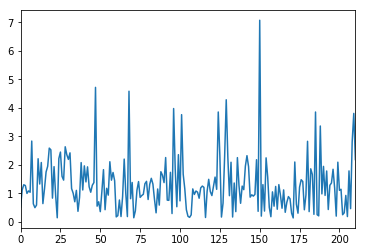

In [316]:
metrics['std'].iloc[:, 0].plot()

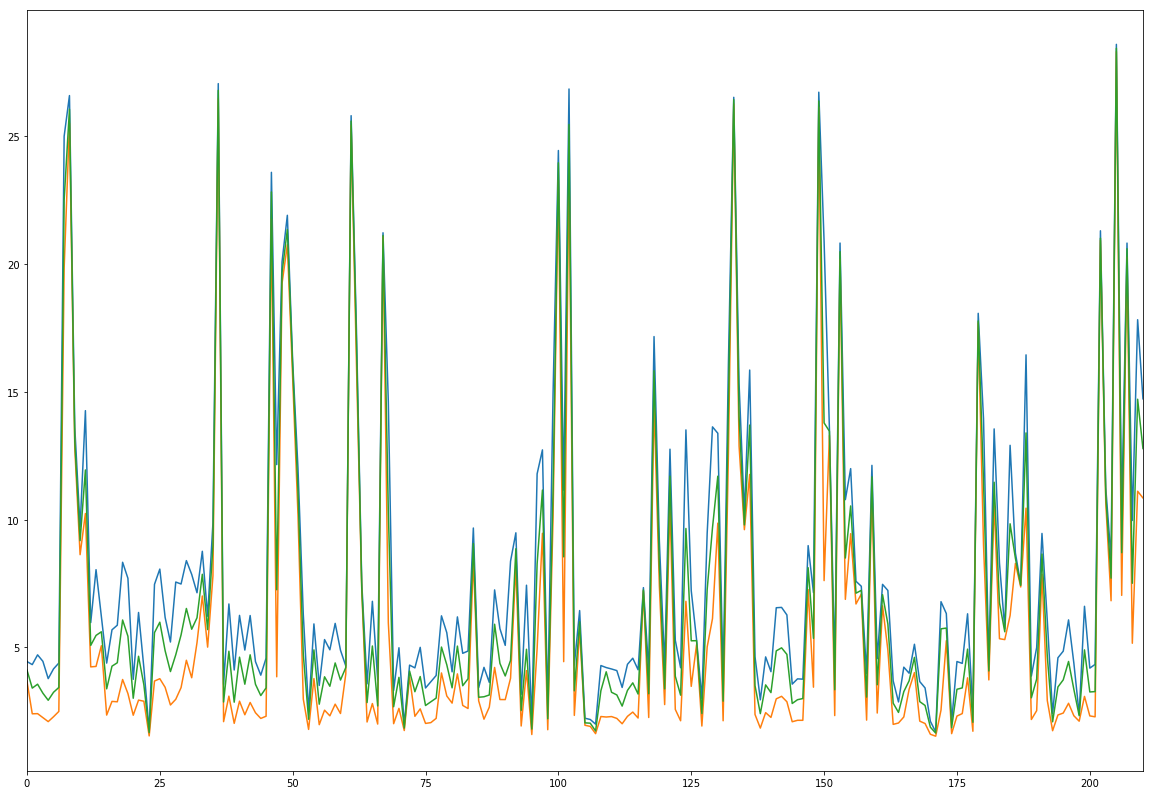

In [322]:
plt.figure(figsize=(20,14))
metrics['75%'].iloc[:, 0].plot()
metrics['25%'].iloc[:, 0].plot()
metrics['50%'].iloc[:, 0].plot()

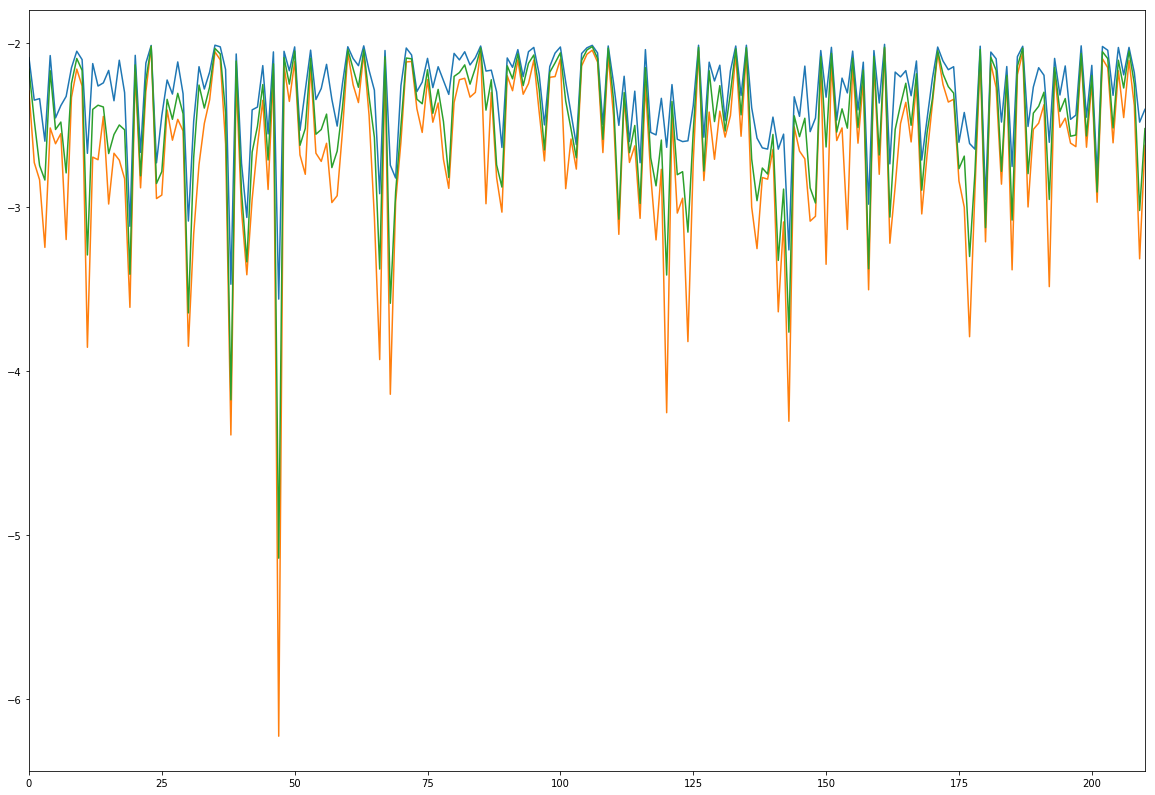

In [321]:
plt.figure(figsize=(20,14))
metrics['75%'].iloc[:, 1].plot()
metrics['25%'].iloc[:, 1].plot()
metrics['50%'].iloc[:, 1].plot()

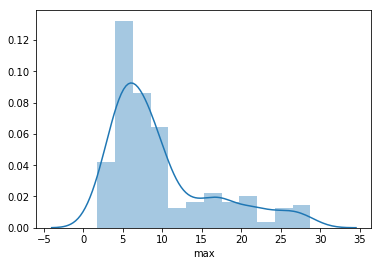

In [249]:
sns.distplot(metrics_df['max'])

In [198]:
boundaries[141].speed.describe()

count    208.000000
mean       7.252071
std        2.299128
min        4.004320
25%        5.020521
50%        7.267772
75%        9.468421
max       10.665595
Name: speed, dtype: float64

In [124]:
boundaries[0][0],boundaries[0][1]

(0, 4734)

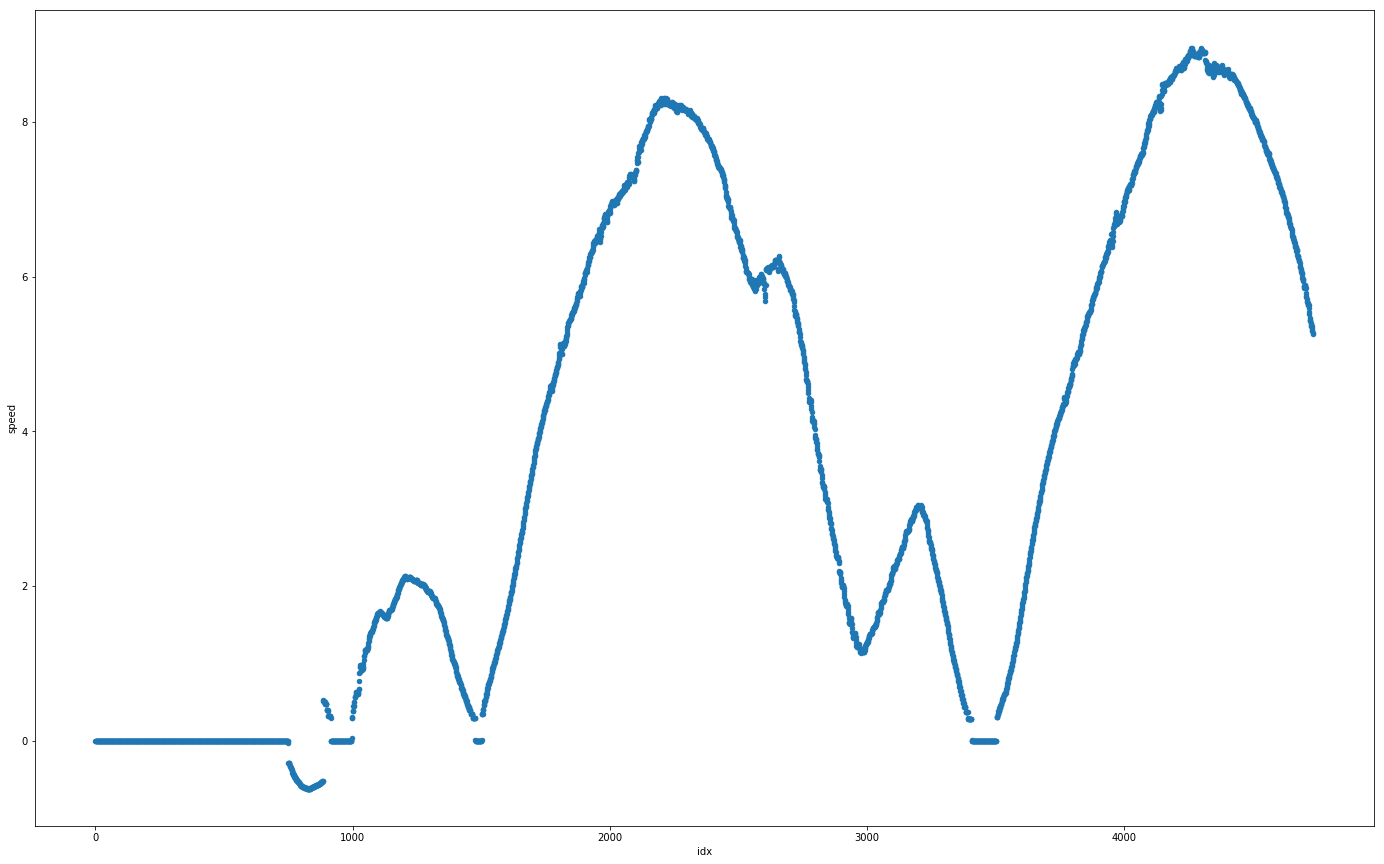

In [126]:
df[0:4734].plot(x='idx', y='speed', kind='scatter', figsize=(24,15))

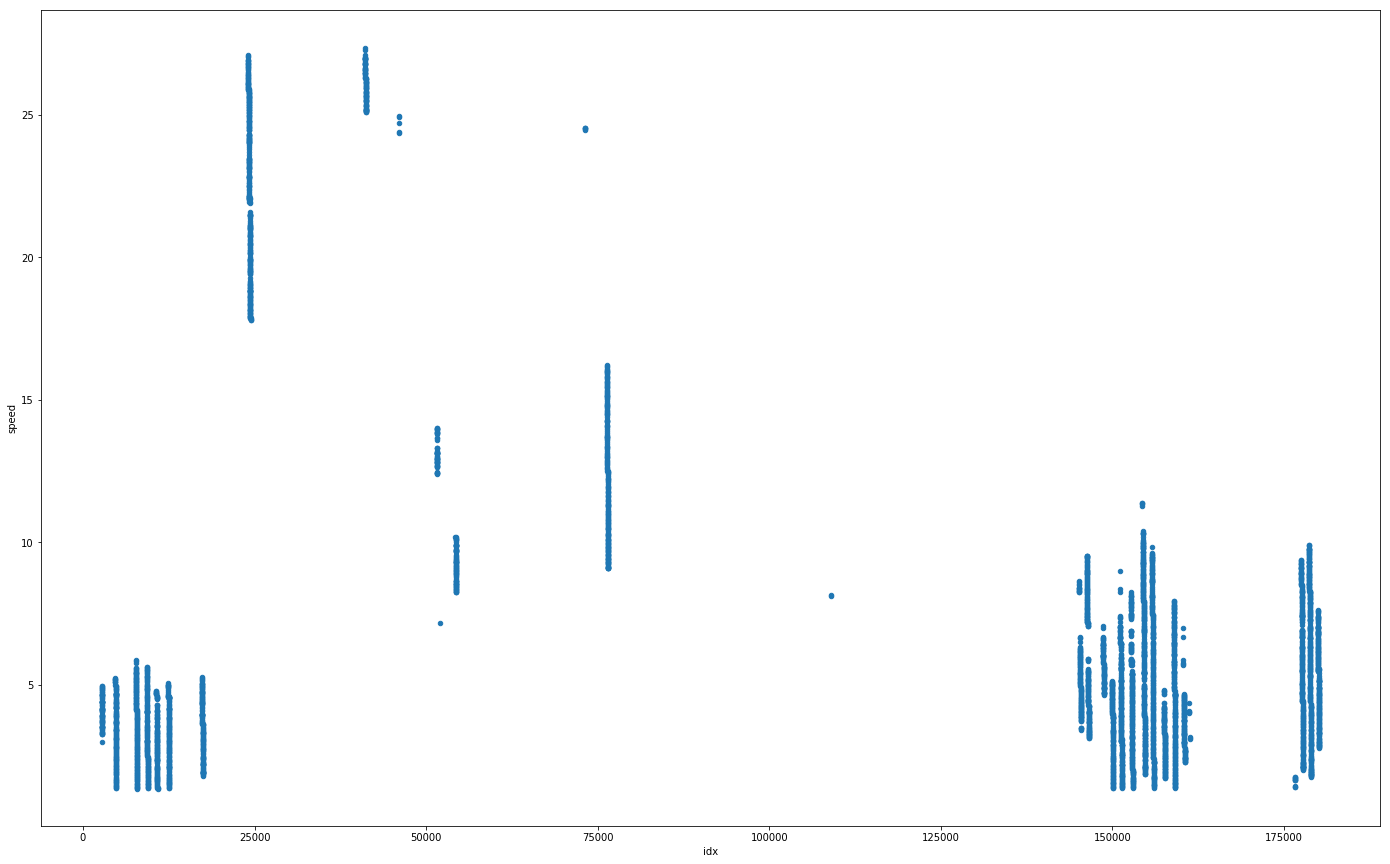

In [120]:
brake_df[boundaries[0][0]:boundaries[0][1]].plot(x='idx', y='speed', kind='scatter', figsize=(24,15))

In [241]:
import re

In [267]:
re.sub('/\b(Pak)\b/', 'dsdsd', 'Pak Pakistan')

'Pak Pakistan'